In [1]:
# Filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# <font color = blue > EDA Case Study </font>

### <font color = Green > Business Understanding </font>

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. **PS: Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.**


When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

+ If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

+ If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

+ **Approved**: The Company has approved loan Application

+ **Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

+ **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

+ **Unused offer**:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.


### <font color = Green > Business Objectives </font>

This case study aims to **identify patterns which indicate if a client has difficulty paying their installments** which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.  **What are your driving varibles??**

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### <font color = Green > Results Expected by Learners: </font>
    
+ Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

+ Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

**Hint:** Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

+ Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

+ Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint:** How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the **‘Target variable’** in the dataset **( clients with payment difficulties and all other cases).** Use a mix of univariate and bivariate analysis etc.

**Hint:** Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

+ Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

+ Find the top 10 correlation for the **Client with payment difficulties and all other cases (Target variable)**. Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: **Var1, Var2, Var3, Var4, Var5, Target.** And if you have to find top 3 correlation, it can be: **Var1 & Var2, Var2 & Var3, Var1 & Var3.** Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

+ Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the **clients with payment difficulties with all other cases.**

##  Task - 1: Reading and understanding the dataset - 1

### Subtask 1.1: Importing the current application data.

In [4]:
# Read the csv file using 'read_csv'. 
appl_df = pd.read_csv('application_data.csv')
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

###  Subtask 1.2: Inspecting the Dataframe


In [5]:
# Check the number of rows and columns in the dataframe

appl_df.shape

(307511, 122)

In [6]:
# Check the column-wise info and datatypes of the dataframe

appl_df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

###  Subtask 1.3: Dealing with Null Values in Columns above 35%

In [7]:
# Checking Null Values

null_col = round((appl_df.isnull().sum()*100/len(appl_df)).sort_values(ascending = False),2)
null_col_35 = null_col[null_col>35] 
print(null_col_35)
print()
print("Number of Columns having missing values more than 35% :",len(null_col_35))

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [8]:
null_col_35.index

# Even if some of the columns may seem relevant as more than 35% of the data is missing in them, let's drop them out...

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE',
       'EMERGE

In [9]:
# Dropping Columns Having Missing Values more than 35%

appl_df.drop(columns = null_col_35.index, inplace = True)

In [10]:
appl_df.shape # Now there are 73 columns remaining. 

(307511, 73)

### Subtask 1.4: Dealing with rest of the Null Values in Columns 

In [11]:
def remain_null_col(df):
    return round(appl_df.isnull().sum()*100/len(appl_df),4)

In [12]:
# Checking Null values greater than 0 inclusing the minuscule ones also

remain_null_col(appl_df)[remain_null_col(appl_df)>0]

AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_TYPE_SUITE                0.4201
OCCUPATION_TYPE               31.3455
CNT_FAM_MEMBERS                0.0007
EXT_SOURCE_2                   0.2146
EXT_SOURCE_3                  19.8253
OBS_30_CNT_SOCIAL_CIRCLE       0.3320
DEF_30_CNT_SOCIAL_CIRCLE       0.3320
OBS_60_CNT_SOCIAL_CIRCLE       0.3320
DEF_60_CNT_SOCIAL_CIRCLE       0.3320
DAYS_LAST_PHONE_CHANGE         0.0003
AMT_REQ_CREDIT_BUREAU_HOUR    13.5016
AMT_REQ_CREDIT_BUREAU_DAY     13.5016
AMT_REQ_CREDIT_BUREAU_WEEK    13.5016
AMT_REQ_CREDIT_BUREAU_MON     13.5016
AMT_REQ_CREDIT_BUREAU_QRT     13.5016
AMT_REQ_CREDIT_BUREAU_YEAR    13.5016
dtype: float64

In [13]:
# Identifying the spread of Annuity Amount Range

appl_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [14]:
appl_df['AMT_ANNUITY'].mode()

0    9000.0
dtype: float64

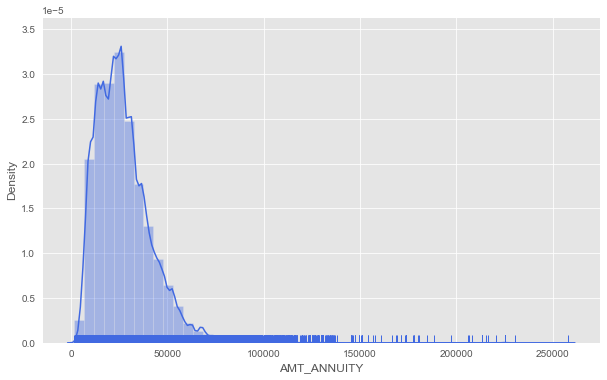

In [15]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(appl_df['AMT_ANNUITY'], rug = True, color = 'royalblue')
plt.show()

### <font color = Green > INSIGHT </font>

Since there is a lot difference in mean and the max which means outliers and median is smaller than mean, I will replace the missing values in  AMT_ANNUITY with mode.

In [16]:
appl_df['AMT_ANNUITY'].isnull().sum()

12

In [17]:
appl_df['AMT_ANNUITY'].mode()[0]

9000.0

In [18]:
appl_df['AMT_ANNUITY'].fillna(appl_df['AMT_ANNUITY'].mode()[0], axis = 0, inplace = True)

In [19]:
appl_df['AMT_ANNUITY'].isna().sum()

0

### <font color = Green > WAY FORWARD </font>

Similarly Let's check all data in once having Null Values below 35% except Name_Type_Suit & Occupation_Type as they are Categorical:

In [20]:
appl_df[['AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',    
'OBS_60_CNT_SOCIAL_CIRCLE',       
'DEF_60_CNT_SOCIAL_CIRCLE',       
'DAYS_LAST_PHONE_CHANGE',         
'AMT_REQ_CREDIT_BUREAU_HOUR',   
'AMT_REQ_CREDIT_BUREAU_DAY', 
'AMT_REQ_CREDIT_BUREAU_WEEK', 
'AMT_REQ_CREDIT_BUREAU_MON',     
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_GOODS_PRICE  CNT_FAM_MEMBERS  EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count     3.072330e+05    307509.000000  3.068510e+05  246546.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean      5.383962e+05         2.152665  5.143927e-01       0.510853                  1.422245                  0.143421                  1.405292                  0.100049             -962.858788                    0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std       3.694465e+05         0.910682  1.910602e-01       0.194844                  2.400989                  0.446698                  2.379803                  0.362291              826.808487                    0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min       4.050000e+04         1.000000  8.173617e-08       0.000527                  0.000000                  0.000000                  0.000000                  0.000000            -4292.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%       2.385000e+05         2.000000  3.924574e-01       0.370650                  0.000000                  0.000000                  0.000000                  0.000000            -1570.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%       4.500000e+05         2.000000  5.659614e-01       0.535276                  0.000000                  0.000000                  0.000000                  0.000000             -757.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%       6.795000e+05         3.000000  6.636171e-01       0.669057                  2.000000                  0.000000                  2.000000                  0.000000             -274.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max       4.050000e+06        20.000000  8.549997e-01       0.896010                348.000000                 34.000000                344.000000                 24.000000                0.000000                    4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

### <font color = Green > Rule Followed </font>

All of these are numerical columns are expected to fill msising values over here using the following rules:

1. If Mean ~ Median approximately, substitute by mean.

2. If Mean != median, substitute by median 

3. but if there is a huge difference in mean and max, subsitute if by mode.

### <font color = Green > Insights </font>

+ Most of the above columns seems to a certain type of response from the customers hence should be dicrete and not continous. There replacing their values with median and not mean as mean is in decimel. 
+ Remaining columns null values will be replaced by mean value. 
+ columns like 'DAYS_LAST_PHONE_CHANGE', will deal with them later while correcting them into absolute values. 

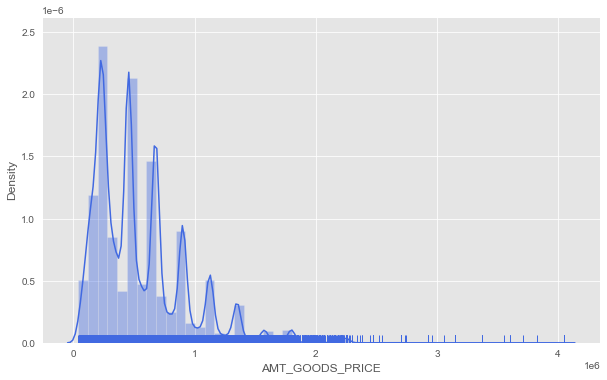

In [21]:
plt.figure(figsize=[10,6])
sns.distplot(appl_df['AMT_GOODS_PRICE'], rug = True, color = 'royalblue')
plt.show()

In [22]:
appl_df['AMT_GOODS_PRICE'].mode()

0    450000.0
dtype: float64

### <font color = Green > Insight </font>

mode is exactly the same as median hence adding 'AMT_GOODS_PRICE' in the median replacing list. 

In [23]:
replace_median_val_df = appl_df[['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',    
'OBS_60_CNT_SOCIAL_CIRCLE',       
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [24]:
# Imputing the median values all at ones for the above selected columns:

for i in replace_median_val_df:

    appl_df[i][appl_df[i].isnull()] = appl_df[i].median()

### <font color = Green > Way Forward </font>

Checking for remaining null values again:

In [25]:
remain_null_col(appl_df)[remain_null_col(appl_df)>0]

NAME_TYPE_SUITE            0.4201
OCCUPATION_TYPE           31.3455
EXT_SOURCE_2               0.2146
EXT_SOURCE_3              19.8253
DAYS_LAST_PHONE_CHANGE     0.0003
dtype: float64

In [26]:
appl_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

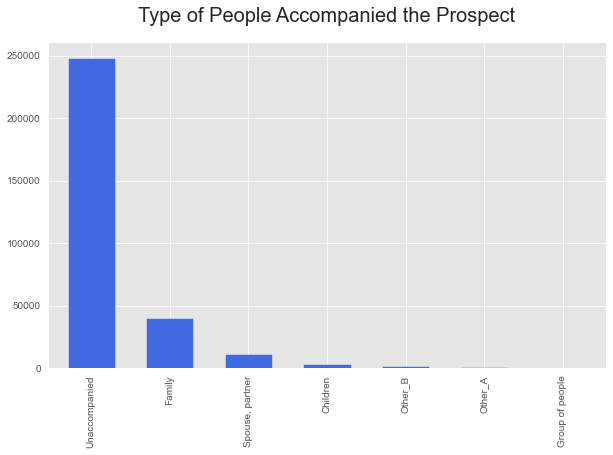

In [27]:
plt.figure(figsize = [10,6])
appl_df['NAME_TYPE_SUITE'].value_counts().plot.bar(color = 'royalblue', width = 0.6)
plt.title("Type of People Accompanied the Prospect", fontdict={"fontsize":20}, pad =20)
plt.show()


### <font color = Green > Insight </font>

+ Here we can see most of our prospect visited alone while filling the application for loan.
+ Or else most of them were accompanied by there Family members or Spouse/Partner.
+ Here we cannot replace the missing values from Name_Type_Suit as it will create a data imbalance, hence we will leave the Null values as it is and deal with the information availble in hand. 

In [28]:
appl_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

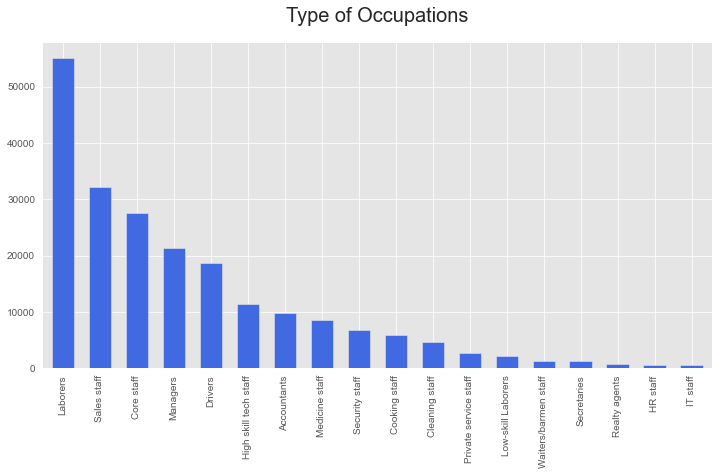

In [29]:
plt.figure(figsize = [12,6])
appl_df['OCCUPATION_TYPE'].value_counts().plot.bar(color = 'royalblue', width = 0.6)
plt.title("Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

### <font color = Green > Insight </font>

+ Our Major Prospects comes from the blue colar category followed by the white collar ones. 
+ The categories are quiet vague, cannot judge someone on the basis of their occupation for getting a loan. 
+ Here we cannot replace the missing values from Occupation_Type as it will create a data imbalance, hence we will leave the Null values as it is and deal with the information availble in hand. 

In [30]:
remain_null_col(appl_df)

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0000
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE                0.0000
FLAG_PHONE               

### <font color = Red >  Datafram is almost free from of Null Values in Rows and Columns:  </font>


In [31]:
appl_df.shape

(307511, 73)

###  Subtask 1.5: Numeric and Categorical Analysis: 

In [32]:
# Check the summary for the numeric columns 

appl_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307511.000000     3.075110e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307511.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  3.068510e+05  246546.000000             307511.000000             307511.000000             307511.000000             307511.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27107.867258     5.383163e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152664              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555  5.143927e-01       0.510853                  1.417523                  0.142944                  1.400626                  0.099717             -962.858788         0.000042         0.710023         0.000081         0.015115         0.088055         0.000192         0.081376         0.003896          0.000023          0.003912          0.000007          0.003525          0.002936           0.00121          0.009928          0.000267          0.008130          0.000595          0.000507          0.000335                    0.005538                   0.006055                    0.029723                   0.231293                   0.229631                    1.778463
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.895950     3.692890e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.91067

### <font color = Green > Insights </font>

+ These numbers in the 'AMT_INCOME_TOTAL','AMT_CREDIT' & 'AMT_GOODS_PRICE' are too big, compromising its readability. Let's convert them into lakhs. 
+ 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' & 'DAYS_LAST_PHONE_CHANGE' have negative values. thus will convert them into absolute. 
+ DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED, CNT_CHILDREN in CHILD_COUNTS and CNT_FAM_MEMBERS in FAMILY_COUNTS
+ Will Analyse 'EXT_SOURCE_2','EXT_SOURCE_3' relevance.

In [33]:
# Analysing categorical values

appl_df.select_dtypes(include=['object']).describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE
count              307511      307511       307511          307511          306219           307511                         307511             307511             307511          211120                     307511                  307511
unique                  2           3            2               2               7                8                              5                  6                  6              18                          7                      58
top            Cash loans           F            N               Y   Unaccompanied          Working  Secondary / secondary special            Married  House / apartment        Laborers                    TUESDAY  Business Entity Type 3
freq               278232      202448       202924          213312          248526           158774                         218391             196432             272868           55186                      53901                   67992

### <font color = Green > Insights </font>


### Subtask 1.6: Standardising Values

In [34]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0     

#### These numbers in the 'AMT_INCOME_TOTAL','AMT_CREDIT' & 'AMT_GOODS_PRICE' are too big, compromising its readability. Let's convert them into Lakh Rupees. 

In [35]:
appl_df['AMT_INCOME_TOTAL'] = round(appl_df['AMT_INCOME_TOTAL']/100000,3)

In [36]:
appl_df['AMT_CREDIT'] = round(appl_df['AMT_CREDIT']/100000,3)

In [37]:
appl_df['AMT_GOODS_PRICE'] = round(appl_df['AMT_GOODS_PRICE']/100000,3)

In [38]:
appl_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']].describe()

AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE
count     307511.000000  307511.000000    307511.000000
mean           1.687979       5.990252         5.383163
std            2.371232       4.024900         3.692890
min            0.256000       0.450000         0.405000
25%            1.125000       2.700000         2.385000
50%            1.472000       5.135000         4.500000
75%            2.025000       8.086000         6.795000
max         1170.000000      40.500000        40.500000

In [39]:
appl_df['AMT_INCOME_TOTAL'].sort_values().value_counts(normalize = True)*100

1.350    11.626251
1.125    10.087769
1.575     8.636114
1.800     8.038412
0.900     7.312909
           ...    
3.492     0.000325
0.737     0.000325
1.843     0.000325
2.944     0.000325
1.906     0.000325
Name: AMT_INCOME_TOTAL, Length: 1876, dtype: float64

#### 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' & 'DAYS_LAST_PHONE_CHANGE' have negative values. thus will convert them into absolute.

In [40]:
days_related = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' , 'DAYS_LAST_PHONE_CHANGE']
appl_df[days_related] = abs(appl_df[days_related])

In [41]:
appl_df[days_related].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count  307511.000000  307511.000000      307511.000000    307511.000000           307510.000000
mean    16036.995067   67724.742149        4986.120328      2994.202373              962.858788
std      4363.988632  139443.751806        3522.886321      1509.450419              826.808487
min      7489.000000       0.000000           0.000000         0.000000                0.000000
25%     12413.000000     933.000000        2010.000000      1720.000000              274.000000
50%     15750.000000    2219.000000        4504.000000      3254.000000              757.000000
75%     19682.000000    5707.000000        7479.500000      4299.000000             1570.000000
max     25229.000000  365243.000000       24672.000000      7197.000000             4292.000000

#### DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED in years, CNT_CHILDREN in CHILD_COUNTS and CNT_FAM_MEMBERS in FAMILY_COUNTS. 

In [42]:
appl_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS']]

DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  CNT_FAM_MEMBERS
0           9461.0          637.0              1.0              1.0
1          16765.0         1188.0              2.0              2.0
2          19046.0          225.0              1.0              1.0
3          19005.0         3039.0              2.0              2.0
4          19932.0         3038.0              1.0              1.0
...            ...            ...              ...              ...
307506      9327.0          236.0              1.0              1.0
307507     20775.0       365243.0              1.0              1.0
307508     14966.0         7921.0              1.0              1.0
307509     11961.0         4786.0              2.0              2.0
307510     16856.0         1262.0              2.0              2.0

[307511 rows x 4 columns]

In [43]:
appl_df["AGE"] = appl_df["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

appl_df["AGE_GROUP"] = pd.cut(appl_df["AGE"], bins=bins, labels=slots)

In [44]:
appl_df["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

### <font color = Green > Insight </font>

Majority of the clients belong to a Age group of 30 to 45 years. 

In [45]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

appl_df["YEARS_EMPLOYED"] = appl_df["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

appl_df["EMPLOYEMENT_YEARS"] = pd.cut(appl_df["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [46]:
appl_df["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100


0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

### <font color = Green > Insight </font>

Majority of our clients are employed between 1 to 15 years. 

In [47]:
#creating column "FAMILY_COUNTS" from "CNT_FAM_MEMBERS": 

appl_df["FAMILY_COUNTS"] = pd.cut(appl_df.CNT_FAM_MEMBERS, [0,2,4,6,8,10,12,14,16,17,18,20], labels=["<2", "2-4", "4-6", "6-8", "8-10", "10-12", "12-14", "14-16", "16-18", "18-20", "20+"])
appl_df.FAMILY_COUNTS.value_counts(normalize= True)*100

<2       73.560295
2-4      25.136662
4-6       1.263695
6-8       0.032844
8-10      0.002927
14-16     0.000976
12-14     0.000976
10-12     0.000976
20+       0.000650
18-20     0.000000
16-18     0.000000
Name: FAMILY_COUNTS, dtype: float64

### <font color = Green > Insight </font>

Majority of our clients have a family of less than 4 members. 

In [48]:
#creating column "CHILD_COUNTS" from "CNT_CHILDREN": 

appl_df["CHILD_COUNTS"] = pd.cut(appl_df.CNT_CHILDREN, [0,1,2,3,4,5,6,7,8,9,10], labels=["<1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "9-10", "10+"])
appl_df.CHILD_COUNTS.value_counts(normalize= True)*100

<1      66.338514
1-2     29.033343
2-3      4.034429
3-4      0.465636
4-5      0.091174
5-6      0.022793
6-7      0.007598
10+      0.002171
9-10     0.002171
7-8      0.002171
Name: CHILD_COUNTS, dtype: float64

### <font color = Green > Insight </font>

Majority of our clients have no children or have 1/2 childrens. 

In [49]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS
0      100002       1         Cash loans           M            N               Y             0             2.025       4.066      24700.5            3.510   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                  1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0  25.920548     25-30        1.745205               0-5            <2          NaN
1      100003       0         Cash loans           F            N               N             0             2.700      12.935      35698.5           11.295          Family    State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       1.0                       0.0                       1.0                       0.0                   828.0                0                1                0                

#### Analyse 'EXT_SOURCE_2','EXT_SOURCE_3' relevance?

In [50]:
appl_df[['EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']].corr()

EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_2      1.000000      0.109167 -0.160472
EXT_SOURCE_3      0.109167      1.000000 -0.178919
TARGET           -0.160472     -0.178919  1.000000

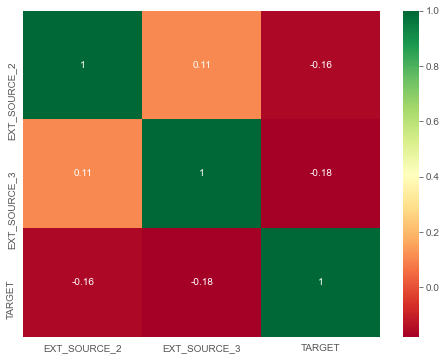

In [51]:
plt.figure(figsize = [8,6])
sns.heatmap(appl_df[['EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']].corr(), annot = True, cmap = "RdYlGn")
plt.show()

### <font color = Green > Insight </font>

There seem no correlation between EXT_SOURCE_2 , EXT_SOURCE_3 and TARGET variable, hence dropping them. 

In [52]:
appl_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis = 1, inplace = True)

In [53]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS
0      100002       1         Cash loans           M            N               Y             0             2.025       4.066      24700.5            3.510   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0  25.920548     25-30        1.745205               0-5            <2          NaN
1      100003       0         Cash loans           F            N               N             0             2.700      12.935      35698.5           11.295          Family    State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                0                1                0                0                0                0                0                0               

In [54]:
# Also, creating a separate dataframe of Numeric Columns for further analysis

num_cols = list(appl_df.describe().columns)

In [55]:
len(appl_df.describe().columns)

61

In [56]:
# Also, creating a separate dataframe of Categorical Columns for further analysis

cat_cols = list(set(appl_df.columns) - set(appl_df.describe().columns))

In [57]:
len(cat_cols)

16

### Subtask 1.7: Identifying Outliers

In [58]:
# calling numerical columns: 
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG

In [59]:
# Will only take those are relevant to Analyse: 

outliers_num_cols = [ 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AGE',
 'YEARS_EMPLOYED',
 'DAYS_REGISTRATION']

In [60]:
list(enumerate(outliers_num_cols))

[(0, 'CNT_CHILDREN'),
 (1, 'AMT_INCOME_TOTAL'),
 (2, 'AMT_CREDIT'),
 (3, 'AMT_ANNUITY'),
 (4, 'AMT_GOODS_PRICE'),
 (5, 'AGE'),
 (6, 'YEARS_EMPLOYED'),
 (7, 'DAYS_REGISTRATION')]

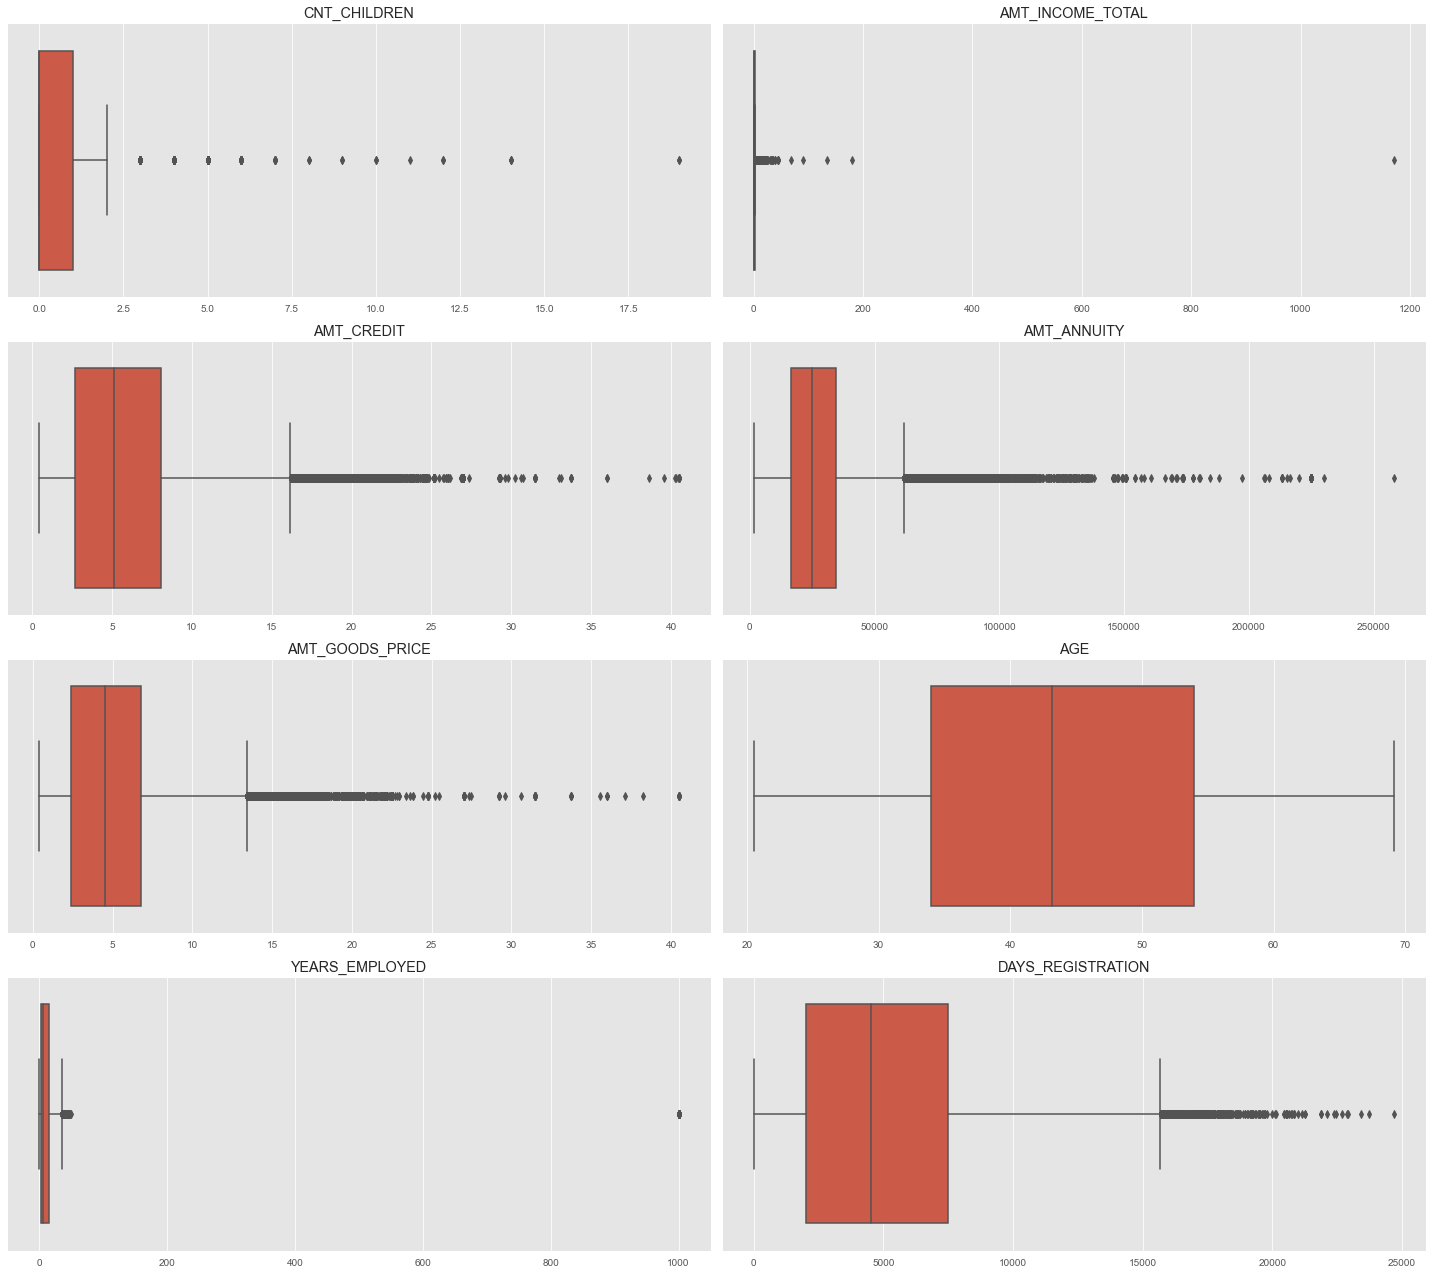

In [61]:
plt.figure(figsize=([20,22]))

for n,col in enumerate(outliers_num_cols):
    plt.subplot(5,2,n+1)
    sns.boxplot(appl_df[col], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()


### <font color = Green > Insight </font>

1. AMT_INCOME_TOTAL has a huge number outliers which means few of the client have a good income level.
2. CNT_CHILDREN also have large number of outliers, some client has mentioned have childrens more than 5 too which is hilarious and justified for them to take a loan. 
3. AGE seems to be the only column with no outiers, we have converted that column into a categorical one AGE and we will anlyse it further in comparision to TARGET column. 
4. AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' are other columns having some outliers. 
5. YEARS_EMPLOYED have an extreme oultier which is not possible for some to start the employement 350000 days before the application. 

### Subtask 1.8: Identifying Imbalance

In [62]:
appl_df['TARGET'].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

In [63]:
appl_df['TARGET'].value_counts(normalize=True)*100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

### <font color = Green > Insight </font>

+ Imbalance in the Data Class Target
+ As we know, 1 is Client with payment difficulties i.e probability of being a Defaulter and 0 is all other cases i.e we can assume Repayer. 
+ 91% of the Clients have a probability of Repaying the loan on time, whereas 9% of the clients have a probability of defaulting it. 

In [64]:
## Lets calculate the ratio of imbalance

(appl_df.TARGET==0).sum()/(appl_df.TARGET==1).sum()
# appl_df[appl_df.TARGET==0].shape[0] / appl_df[appl_df.TARGET==1].shape[0]

11.387150050352467

### <font color = Green > Ratio of Imbalance: 11.39 </font>



In [65]:
appl_df['NEW_TARGET'] = appl_df['TARGET'].apply(lambda x: 'Repayer' if x == 0 else 'Defaulter')
appl_df['NEW_TARGET'].value_counts(normalize=True)*100

Repayer      91.927118
Defaulter     8.072882
Name: NEW_TARGET, dtype: float64

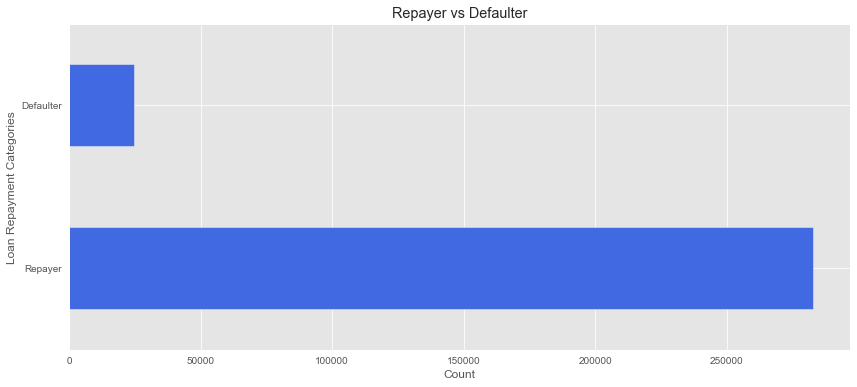

In [66]:
plt.figure(figsize = [14,6])
appl_df['NEW_TARGET'].value_counts().plot.barh(color = 'royalblue')
plt.ylabel("Loan Repayment Categories")
plt.xlabel("Count")
plt.title("Repayer vs Defaulter")
plt.show()

### Subtask 1.9: Sorting Imbalance into two different dataframes: 


+ let's Bifurcate the both Loan Repayemnt Categories into two different datasets for indvidual comparision with the driving variables. 

In [67]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET
0      100002       1         Cash loans           M            N               Y             0             2.025       4.066      24700.5            3.510   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0  25.920548     25-30        1.745205               0-5            <2          NaN  Defaulter
1      100003       0         Cash loans           F            N               N             0             2.700      12.935      35698.5           11.295          Family    State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                0                1                0                0                0                0                0          

In [68]:
Repayer_0 = appl_df.loc[appl_df['NEW_TARGET'] == 'Repayer']
Defaulter_1 = appl_df.loc[appl_df['NEW_TARGET'] == 'Defaulter']

In [69]:
Repayer_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET
1      100003       0         Cash loans           F            N               N             0             2.700      12.935      35698.5           11.295           Family    State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0  45.931507     45-50        3.254795               0-5            <2          NaN    Repayer
2      100004       0    Revolving loans           M            Y               Y             0             0.675       1.350       6750.0            1.350    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032     19046.0          225.0             4260.0           2531.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                   815.0                0                0                0                0                0                0                0       

In [70]:
Defaulter_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET
0       100002       1         Cash loans           M            N               Y             0             2.025       4.066      24700.5            3.510   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0  25.920548     25-30        1.745205               0-5            <2          NaN  Defaulter
26      100031       1         Cash loans           F            N               Y             0             1.125       9.800      27076.5            7.020   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment                    0.018029     18724.0         2628.0             6573.0           1827.0           1               1                0                 1           0           0   Cooking staff              1.0                     3                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0  Business Entity Type 3                      10.0                       1.0                      10.0                       0.0                   161.0                0                1                0                0                0                0          

## Subtask 1.10: Categorical Analysis 

In [71]:
# Calling categorical columns: 

cat_cols

['FLAG_OWN_REALTY',
 'CHILD_COUNTS',
 'EMPLOYEMENT_YEARS',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'AGE_GROUP',
 'OCCUPATION_TYPE',
 'FAMILY_COUNTS',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


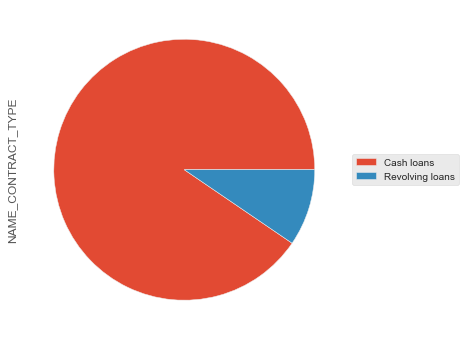

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


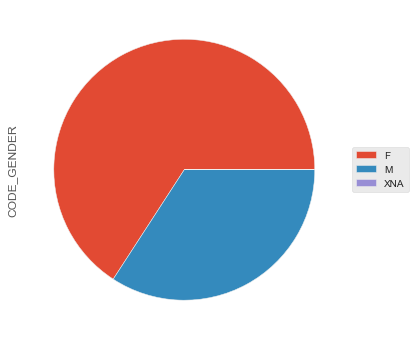

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


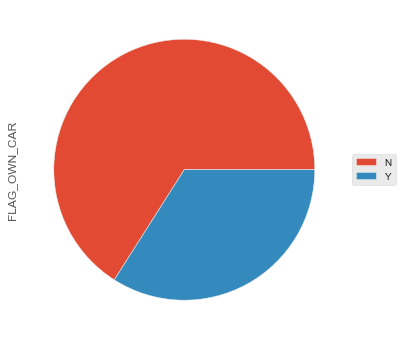

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


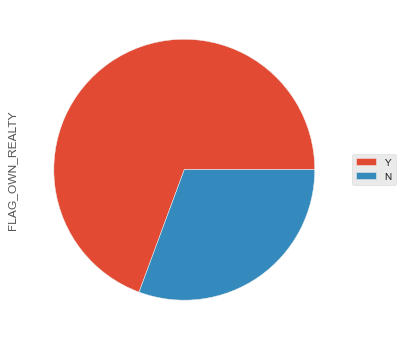

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64


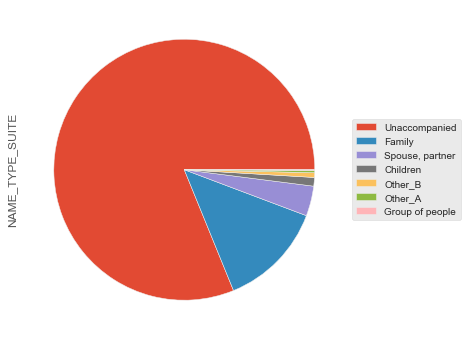

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


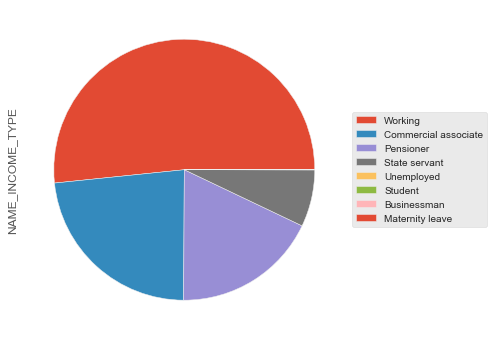

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64


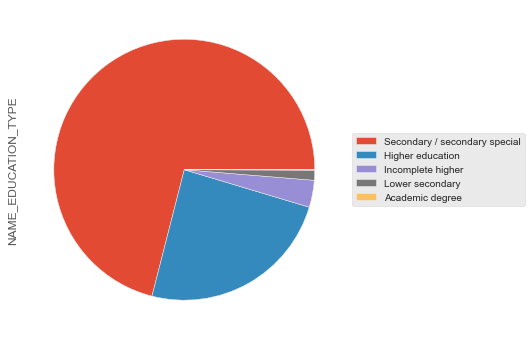

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64


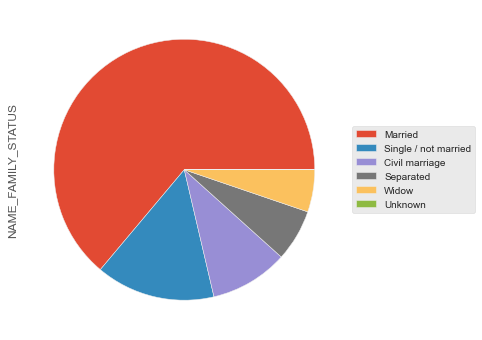

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64


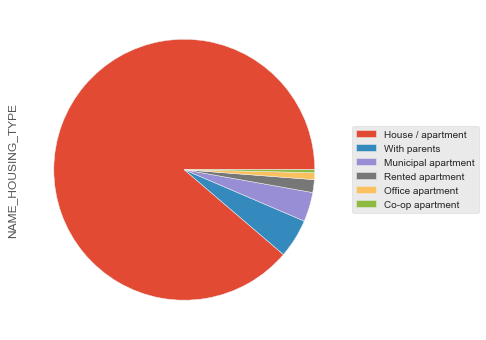

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64


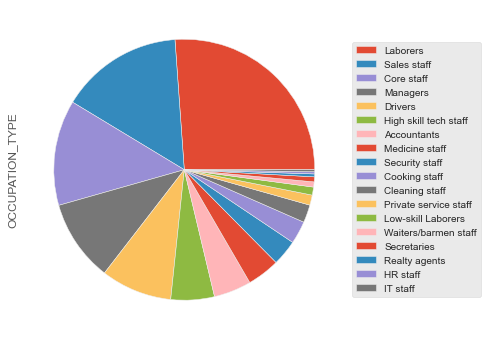

TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


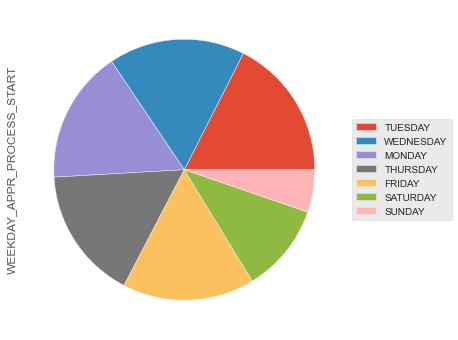

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

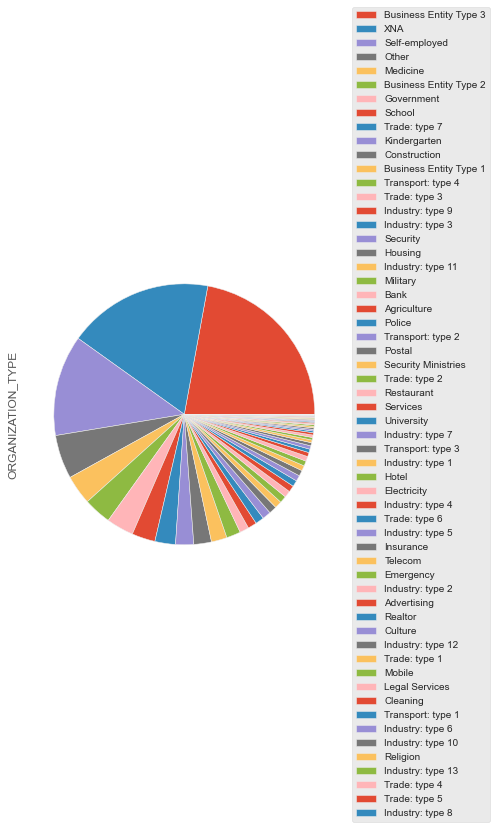

Repayer      91.927118
Defaulter     8.072882
Name: NEW_TARGET, dtype: float64


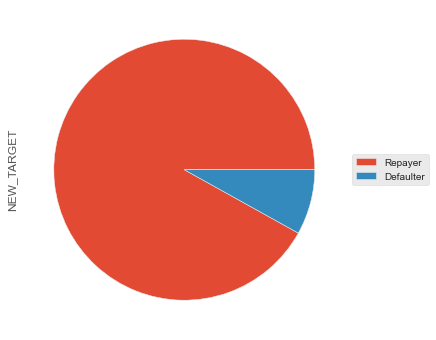

In [72]:
# Univatriate Categorical Analysis for better understanding of those columns:

for i in appl_df.columns:
    if appl_df[i].dtypes ==  "object":
        print(appl_df[i].value_counts(normalize = True)*100)
        plt.figure(figsize=[6,6])
        appl_df[i].value_counts(normalize = True).plot.pie(labeldistance=None)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        #plt.tight_layout()
        plt.show()

### <font color = Green > Insight </font>

+ Cash loans offered are more than revolving loans. 
+ Majority of Females have taken loans in comparison to males. 
+ Most applicant dont own cars
+ Most applicants own living quarters
+ Most applicants came accompanied for loan application
+ While most applicants are working class, 18% are pensioners
+ Most have secondary education
+ Most are married
+ Most of them have mention their Occupation Type
+ There are some unwanted values in Gender and Organization Type as XNA, let's replace that the Gender one.

In [73]:
Repayer_0['CODE_GENDER'].value_counts()

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

In [74]:
Repayer_0.loc[Repayer_0['CODE_GENDER']=='XNA','CODE_GENDER']='F'
Repayer_0['CODE_GENDER'].value_counts()

F    188282
M     94404
Name: CODE_GENDER, dtype: int64

In [75]:
def univariate_categorical(data , col , title, hue):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 15
    
    #fig, ax = plt.subplots(1,2, sharey = True)
    plt.figure(figsize=(10,8))
    sns.countplot(data = data, x = col, order = data[col].value_counts().index, hue = hue, palette='magma') 
    plt.xticks(rotation=45)
    plt.title(title) 
    plt.show()


### Analysis In Respect to Repayers: 

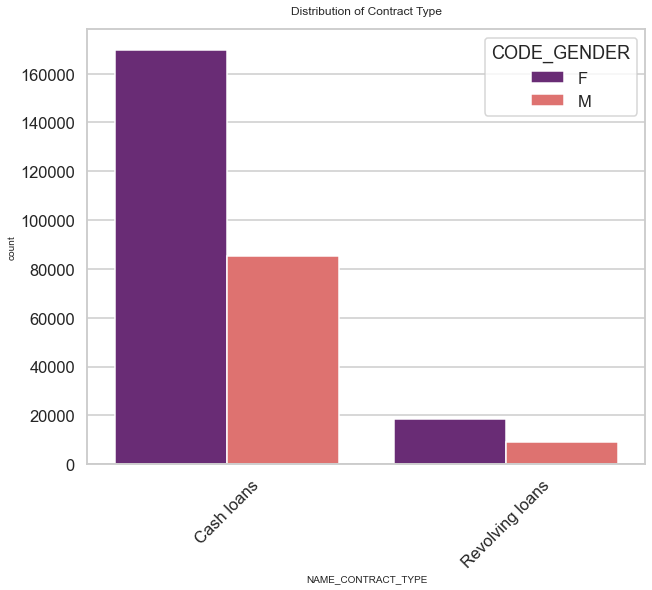

In [76]:
univariate_categorical(Repayer_0, col = 'NAME_CONTRACT_TYPE', title = 'Distribution of Contract Type', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Under Repayer Database, Cash Loans have larger number of credit base than Revolving loans. 
+ Here Females are more who are seeking for Cash Loans as compare to Males.


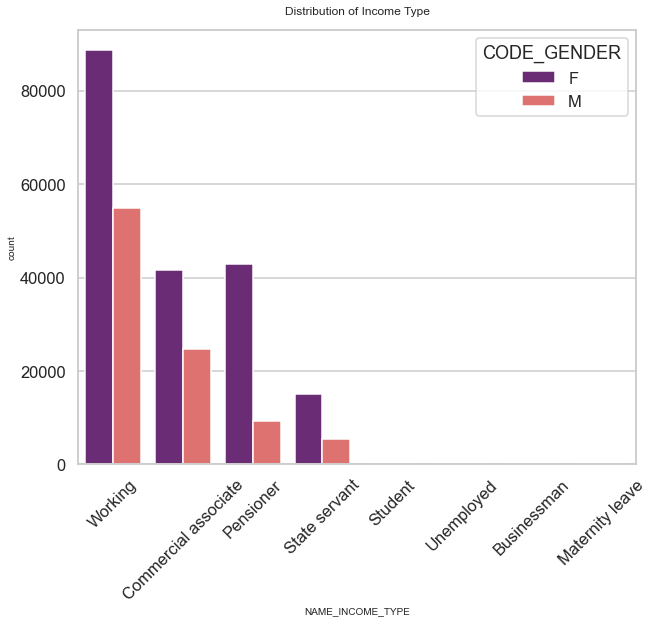

In [77]:
univariate_categorical(Repayer_0, col = 'NAME_INCOME_TYPE', title = 'Distribution of Income Type', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ We can conclude here, that Females from working class can have more credits as compare to Males.
+ Whereas less credits to Students, Unemployed, Businesman and Maternity Leave crowd. 


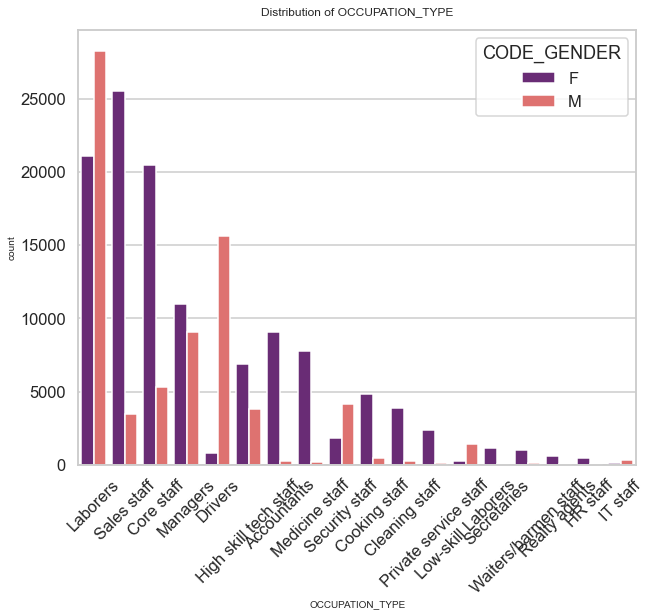

In [78]:
univariate_categorical(Repayer_0, col = 'OCCUPATION_TYPE', title = 'Distribution of OCCUPATION_TYPE', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Males from Laborers class can have more credits in lending the loans. 
+ Also, Females from Sales Staff anf Core Staff can have more credits. 

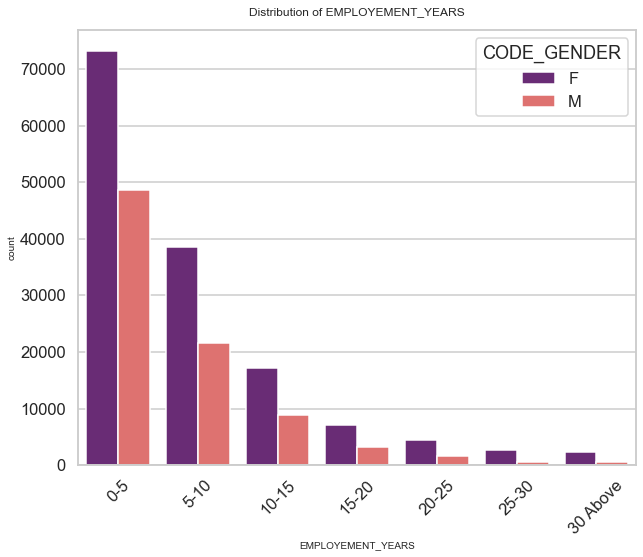

In [79]:
univariate_categorical(Repayer_0, col = 'EMPLOYEMENT_YEARS', title = 'Distribution of EMPLOYEMENT_YEARS', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Most of the Males and Females have been working since between 0-5 years before the loan applicaltion. 
+ But the crowd working for more than 5 years should be given more credits to grant the loan. 

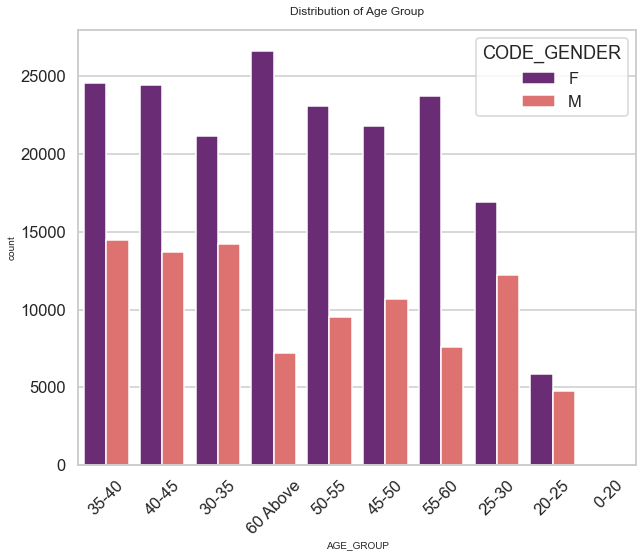

In [80]:
univariate_categorical(Repayer_0, col = 'AGE_GROUP', title = 'Distribution of Age Group', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ In almost all age groups except below 20 years, Females counts are more as compare to Males in having the need for a loan. 
+ It would be interesting to know the reason why? 


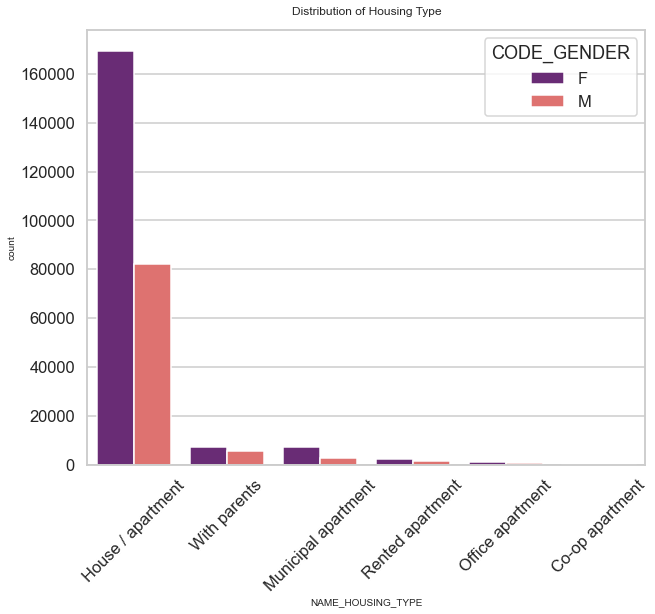

In [81]:
univariate_categorical(Repayer_0, col = 'NAME_HOUSING_TYPE', title = 'Distribution of Housing Type', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ We have more Males and Females both coming from owning a House/apartment with more credits for granting the loan. 


### <font color = Green > Consolidated Insights For Repayers Dataset: </font>

+ Under Repayer Database, Cash Loans have larger number of credit base than Revolving loans. 
+ Here Females are more who are seeking for Cash Loans as compare to Males.
+ We can conclude under Occupation Type that Females from working class can have more credits as compare to Males.
+ Whereas less credits to Students, Unemployed, Businesman and Maternity Leave crowd. 
+ Males from Laborers class can have more credits in lending the loans. 
+ Also, Females from Sales Staff anf Core Staff can have more credits. 
+ Most of the Males and Females have been working since between 0-5 years before the loan applicaltion. 
+ But the crowd working for more than 5 years should be given more credits to grant the loan. 
+ In almost all age groups except below 20 years, Females counts are more as compare to Males in having the need for a loan. 
+ We have more Males and Females both coming from owning a House/apartment with more credits for granting the loan. 

## Categorical Univariate Analysis In Respect to Defaulters: 

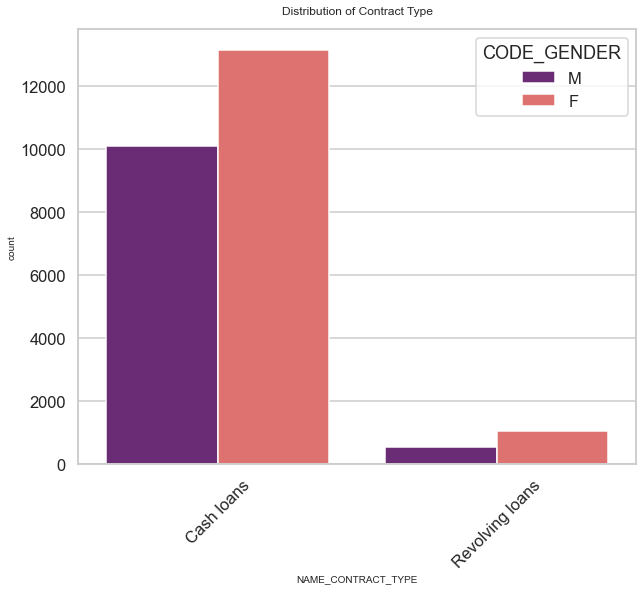

In [82]:
univariate_categorical(Defaulter_1, col = 'NAME_CONTRACT_TYPE', title = 'Distribution of Contract Type', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Under Defaulter Database too, Cash Loans have larger number of credit base than Revolving loans. 
+ Here also, Females are more who have payemnet difficulties for Cash Loans as compare to Males.


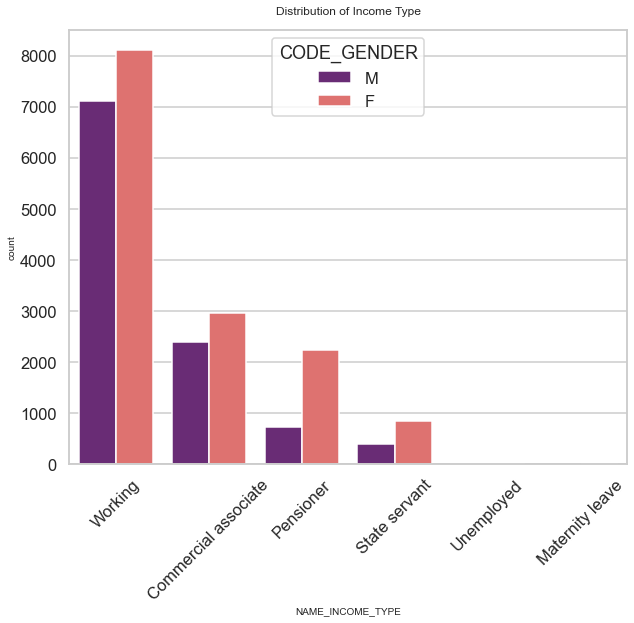

In [83]:
univariate_categorical(Defaulter_1, col = 'NAME_INCOME_TYPE', title = 'Distribution of Income Type', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Most of the Males and Females come from Working Class when it comes to defaulting or Payment Difficulties

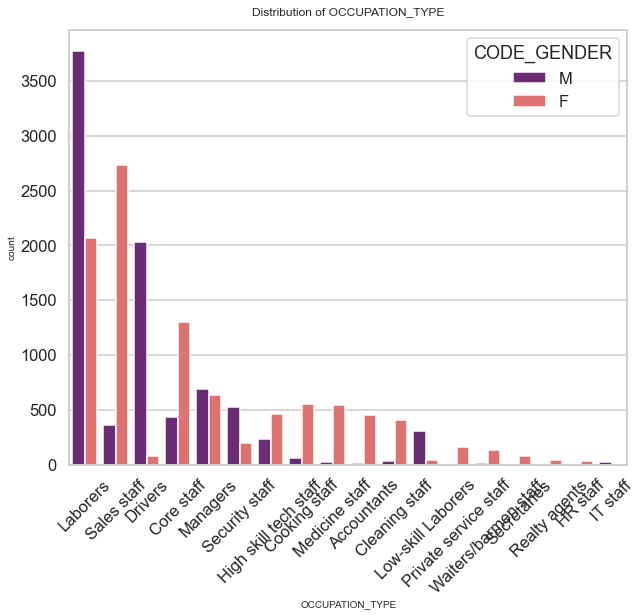

In [84]:
univariate_categorical(Defaulter_1, col = 'OCCUPATION_TYPE', title = 'Distribution of OCCUPATION_TYPE', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Contradictorily, Males from laborers class faces more payment difficulties. 
+ Whereas Females from Sales Staff too. 


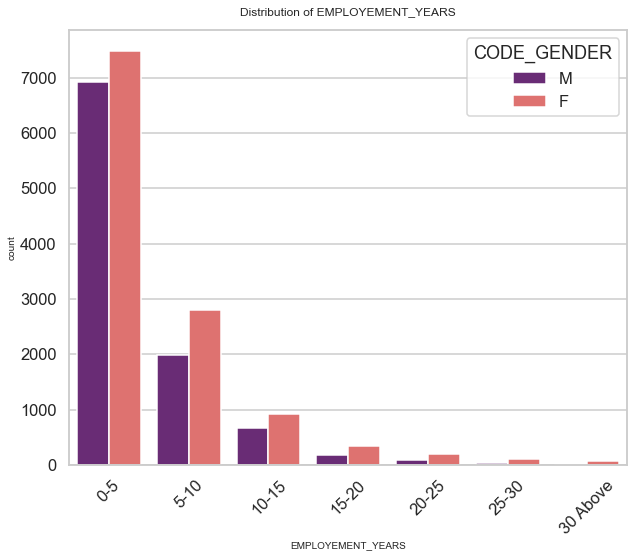

In [85]:
univariate_categorical(Defaulter_1, col = 'EMPLOYEMENT_YEARS', title = 'Distribution of EMPLOYEMENT_YEARS', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Most of the Males and Females have a job period of 0-5 years that faces payment difficulties

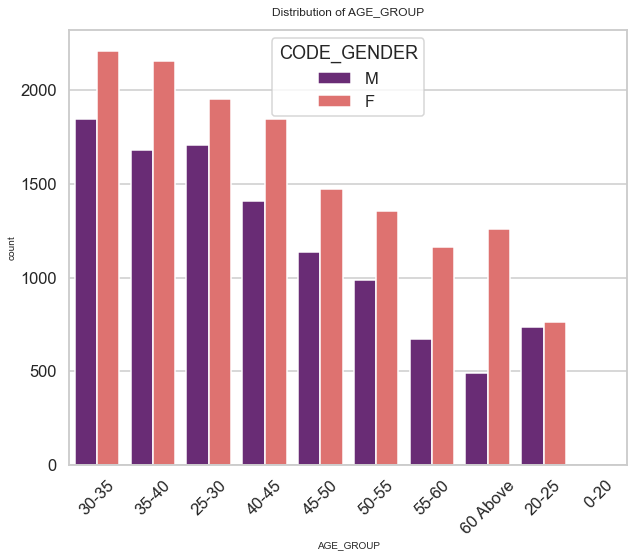

In [86]:
univariate_categorical(Defaulter_1, col = 'AGE_GROUP', title = 'Distribution of AGE_GROUP', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Most of the Males and Females from the Age 30 and above defaults the loans. 

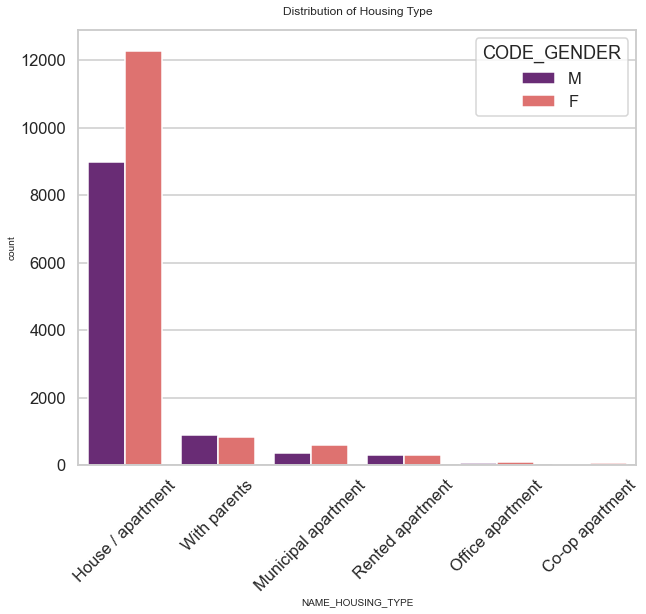

In [87]:
univariate_categorical(Defaulter_1, col = 'NAME_HOUSING_TYPE', title = 'Distribution of Housing Type', hue = 'CODE_GENDER')

### <font color = Green > Points to Note from Graph </font>

+ Similarly, Both the gender categories having an House/appartment faces payement difficulties. 

### <font color = Green > Consolidated Insights For Defaulter dataset: </font>

+ Females are more who have payemnet difficulties for Cash Loans as compare to Males.
+ Most of the Males and Females come from Working Class when it comes to defaulting or Payment Difficulties
+ Contradictorily, Males from laborers class faces more payment difficulties. Whereas Females from Sales Staff too. 
+ Most of the Males and Females have a job period of 0-5 years that faces payment difficulties
+ Most of the Males and Females from the Age 30 and above defaults the loans. 
+ Similarly, Both the gender categories having an House/appartment faces payement difficulties. 

### Checking their Income Level In respect to their Education Status for both male and female separately. 

In [88]:
pd.pivot_table(data = Repayer_0, index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)

CODE_GENDER                             F           M
NAME_EDUCATION_TYPE                                  
Academic degree                   207.666     176.274
Higher education                91629.932   56706.382
Incomplete higher                9491.108    7629.416
Lower secondary                  2494.393    1931.483
Secondary / secondary special  189868.360  117823.970

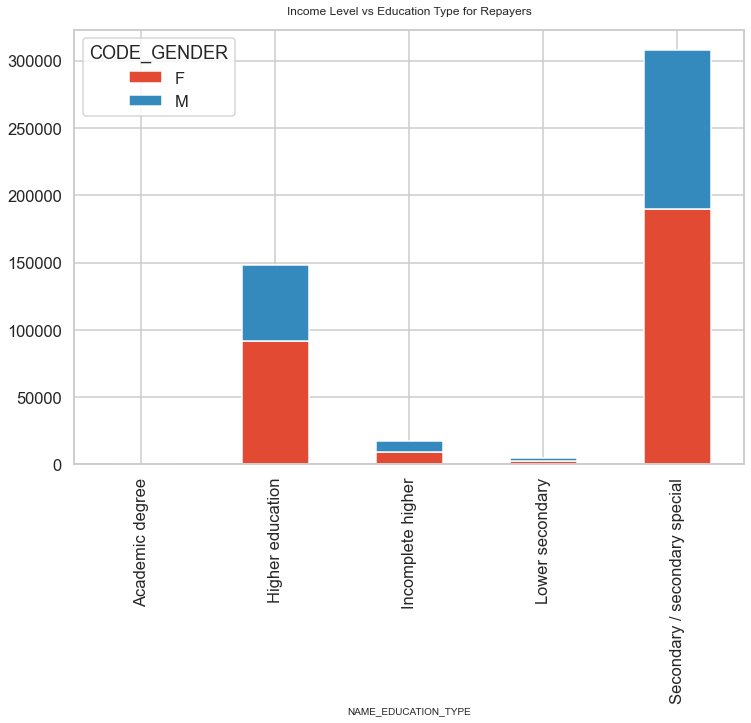

In [89]:
Repayer_Status = pd.pivot_table(data = Repayer_0, index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)
Repayer_Status.plot(kind='bar', stacked="True", figsize=[12,8])
plt.title("Income Level vs Education Type for Repayers")
plt.show()

In [90]:
pd.pivot_table(data = Defaulter_1, index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)

CODE_GENDER                            F          M
NAME_EDUCATION_TYPE                                
Academic degree                    9.675        NaN
Higher education                4397.443   3469.414
Incomplete higher                810.213    728.578
Lower secondary                  252.508    285.443
Secondary / secondary special  16730.429  14429.407

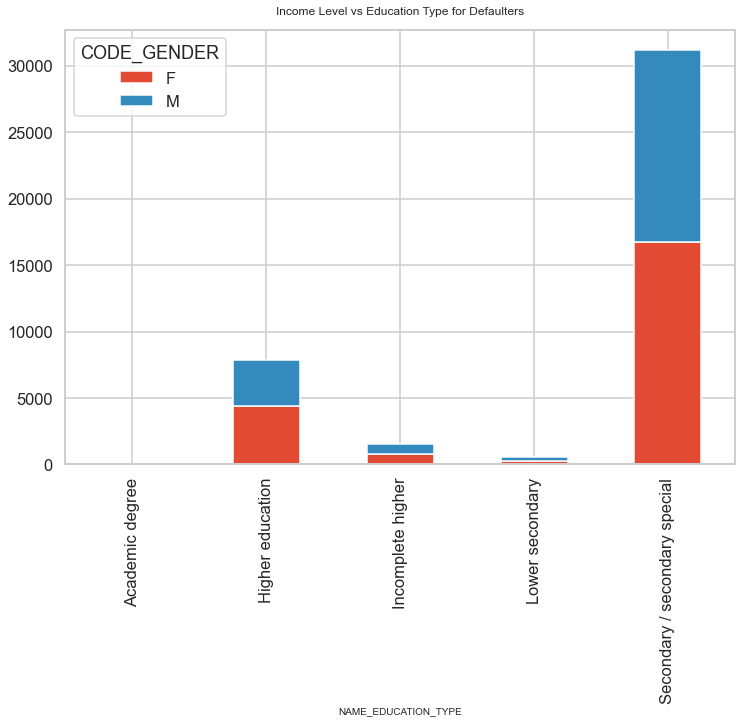

In [91]:
Defaulter_Status = pd.pivot_table(data = Defaulter_1, index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)
Defaulter_Status.plot(kind='bar', stacked="True", figsize=[12,8])
plt.title("Income Level vs Education Type for Defaulters")
plt.show()

### <font color = Green > Insights for Income Level vs Education Type: </font>

+ Females who have completed higher education tend to pay back the loan more when compared to men.
+ Men who have completed lower secondary tend to default more on the loan compared to females.
+ Sum of Income level of females is higher who have completed Secondary/Secondary Special in both defaulters and repayers.
+ Females with an academic degree tend not to default on the loan.

### Checking their Income Level In repect to their Family Status for both male and female separately. 

In [92]:
pd.pivot_table(data = Repayer_0, index = 'NAME_FAMILY_STATUS', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)

CODE_GENDER                    F           M
NAME_FAMILY_STATUS                          
Civil marriage         30823.906   14356.319
Married               176080.892  134638.811
Separated              23984.501    7155.293
Single / not married   42392.482   26846.772
Unknown                    2.025       4.500
Widow                  20407.653    1265.830

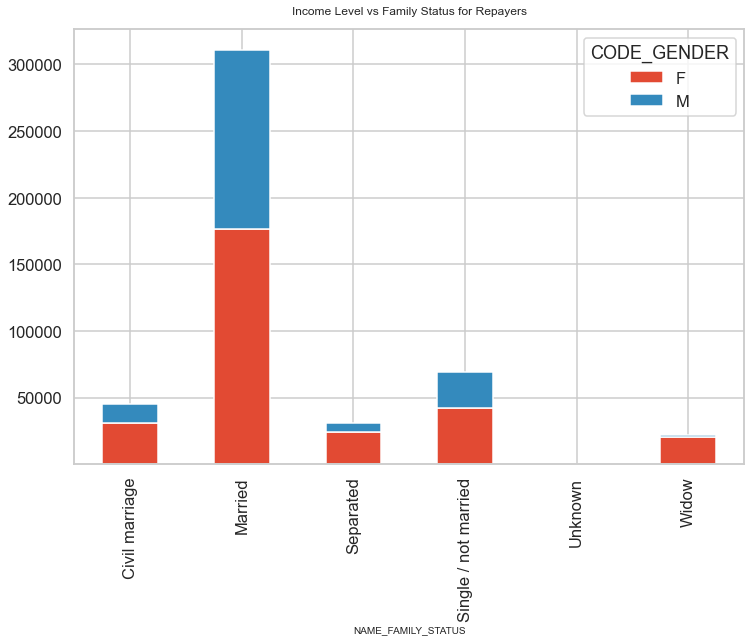

In [93]:
Repayer_Status = pd.pivot_table(data = Repayer_0, index = 'NAME_FAMILY_STATUS', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)
Repayer_Status.plot(kind='bar', stacked="True", figsize=[12,8])
plt.title("Income Level vs Family Status for Repayers")
plt.show()

In [94]:
pd.pivot_table(data = Defaulter_1, index = 'NAME_FAMILY_STATUS', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)

CODE_GENDER                   F          M
NAME_FAMILY_STATUS                        
Civil marriage         2692.968   2101.312
Married               13310.740  11892.529
Separated              1684.116   1028.609
Single / not married   3338.285   3731.941
Widow                  1174.159    158.451

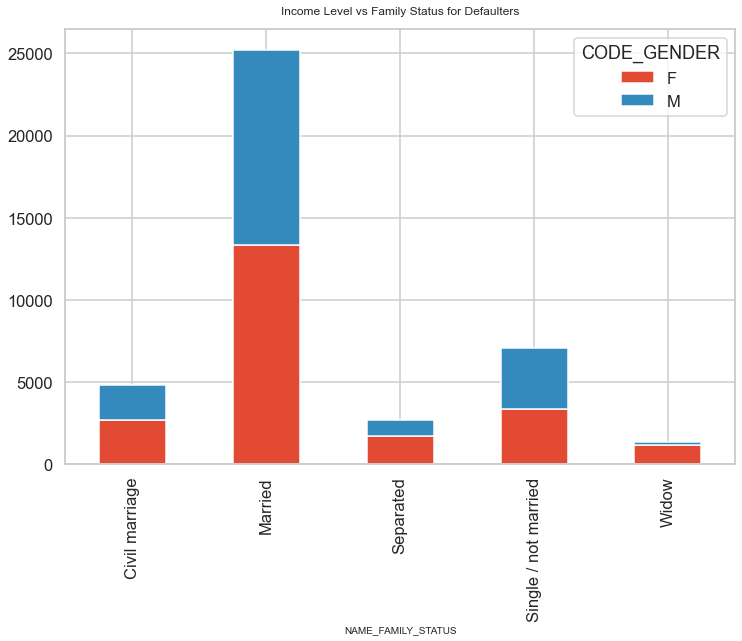

In [95]:
Defaulter_Status = pd.pivot_table(data = Defaulter_1, index = 'NAME_FAMILY_STATUS', columns = 'CODE_GENDER', values = 'AMT_INCOME_TOTAL', aggfunc = sum)
Defaulter_Status.plot(kind='bar', stacked="True", figsize=[12,8])
plt.title("Income Level vs Family Status for Defaulters")
plt.show()

### <font color = Green > Insights for Income Level vs Family Status: </font>

+ We see that the majority of the repayers are married.
+ The number of Females is more compared to men for both repayers and defaulters.
+ Single women can be financially stable without a man.
+ Men are included in the Widow section.
+ A major difference between Males and Females can be seen in the Widow Section.
+ Single men tend to default more on the loan when compared to females.

### Subtask 1.12: Numerical Analysis 

In [96]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG

<Figure size 720x576 with 0 Axes>

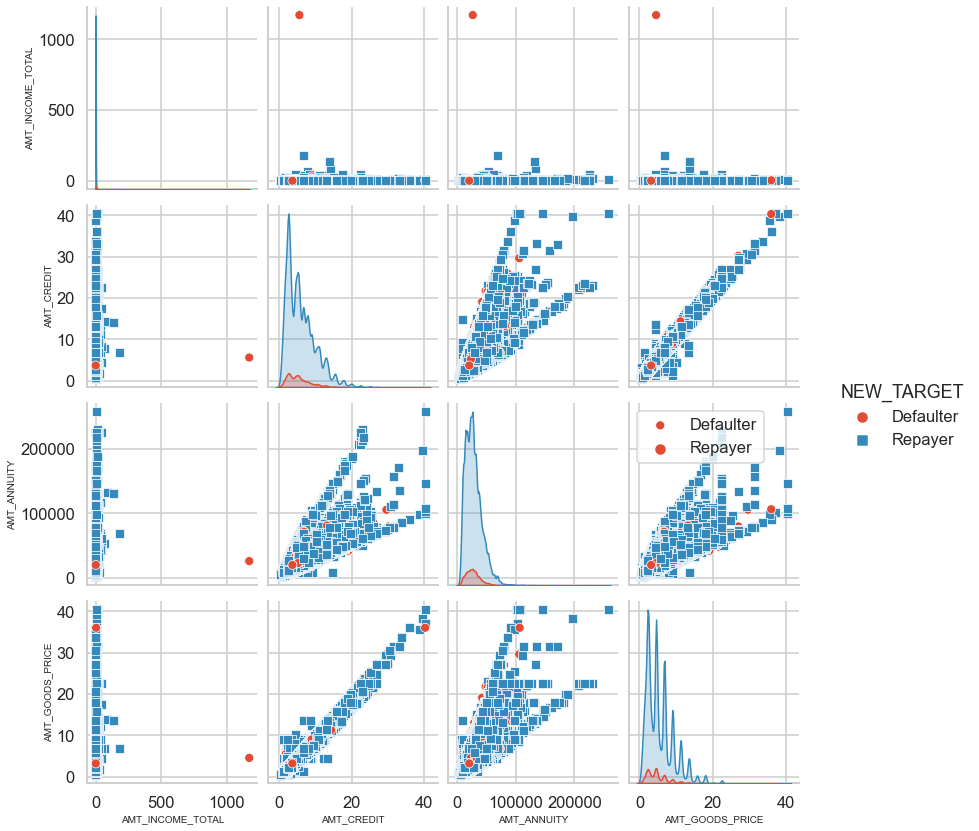

In [97]:
plt.figure(figsize=[10,8])
g=sns.pairplot(appl_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NEW_TARGET"]],
            vars = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"],
            hue = "NEW_TARGET", 
            markers = ['o', 's'])
g.fig.set_size_inches(14,12)
#g.fig.set_figheight(20)
#g.fig.set_figwidth(20)
plt.legend(labels=['Defaulter','Repayer'])
plt.show()

### <font color = Green > Insights: </font>

+ When Annuity is more than 15K and Good Price is more than 20 Lakhs, there are fewer defaulters in that zone. 
+ Loan Amount and Goods price are highly and correlated where most of the data are consolidated in form of a linear line. 
+ There are fewer defaulters for Loan Amount greater than 20 Lakhs. 
+ Loan Amount and Loan Annuity are also high correlated. 

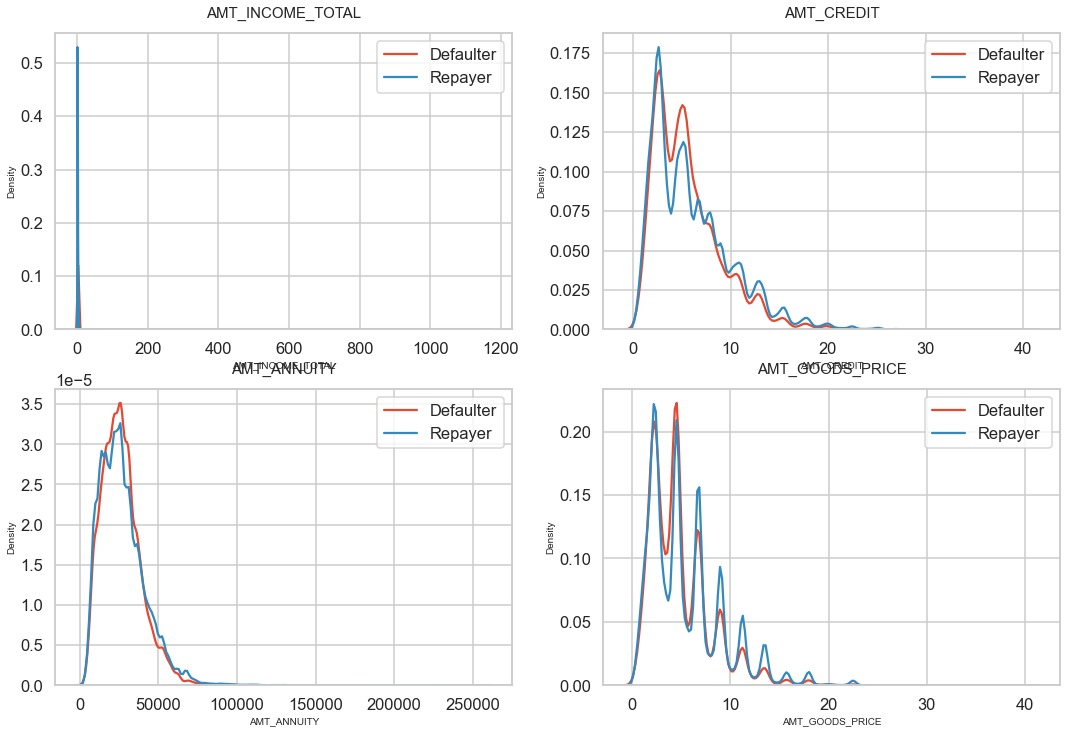

In [98]:
# Plotting the numerical columns related to amount as distribution plot to see density

amt_values = appl_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(18,12))

for i in enumerate(amt_values):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_1[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_0[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

### <font color = Green > Insights: </font>

+ Most no of loans are given for goods price less than 10 lakhs.
+ Most people pay annuity less than 50K for the credit loan.
+ Credit amount of the loan is mostly less then 10 lakhs.
+ Apart from the majority there are few who have a Higher Income Level.

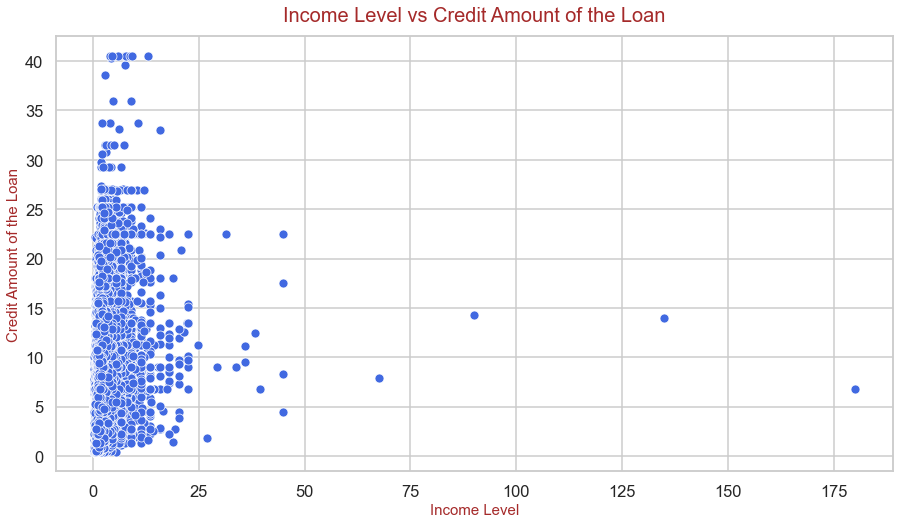

In [99]:
plt.figure(figsize=[15,8])
sns.scatterplot(data = Repayer_0, x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', color = "royalblue")
plt.title('Income Level vs Credit Amount of the Loan', fontsize = 20, color = 'Brown')
plt.xlabel("Income Level", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Credit Amount of the Loan", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

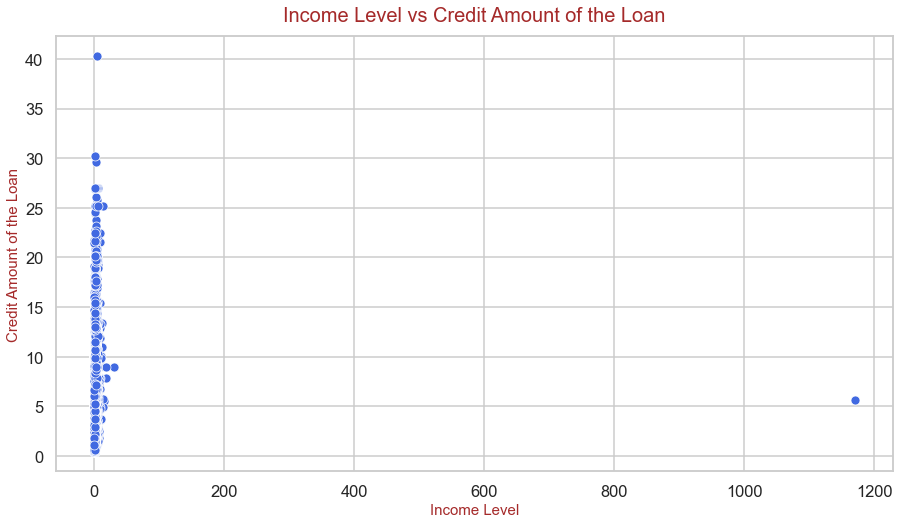

In [100]:
plt.figure(figsize=[15,8])
sns.scatterplot(data = Defaulter_1, x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', color = "royalblue")
plt.title('Income Level vs Credit Amount of the Loan', fontsize = 20, color = 'Brown')
plt.xlabel("Income Level", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Credit Amount of the Loan", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### <font color = Green > Insights for Income Level vs Credit Amount of the Loan: </font>

+ Credit amount is ranging from 0 - 25 lakhs while the income level ranging from 0-15 lakhs in repayers.
+ There is one client with an income level of 175 and the credit amount of exactly 7 in repayers.
+ Repayers have a decent income level with respect to credit amount which makes it easier for the bank to collect their loans. + + This cannot be seen in regards to deafulters as their income levels are low.
+ One client with an income level of around 1170 has a credit amount of around 5.5-6 in defaulters.
+ Defaulters credit amount range from 0-20 which can be a loss to the bank as the amount and the number of clients are big.

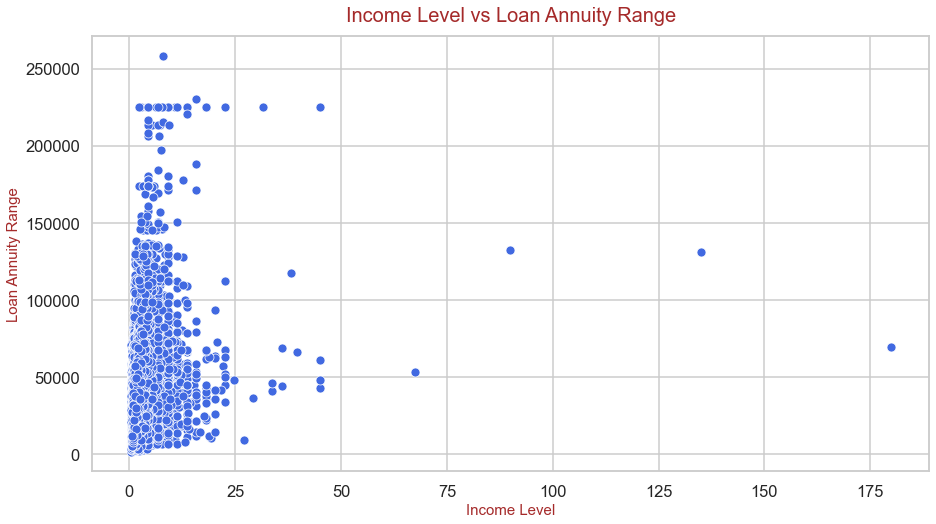

In [101]:
plt.figure(figsize=[15,8])
sns.scatterplot(data = Repayer_0, x = 'AMT_INCOME_TOTAL', y = 'AMT_ANNUITY', color = "royalblue")
plt.title('Income Level vs Loan Annuity Range', fontsize = 20, color = 'Brown')
plt.xlabel("Income Level", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Annuity Range", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

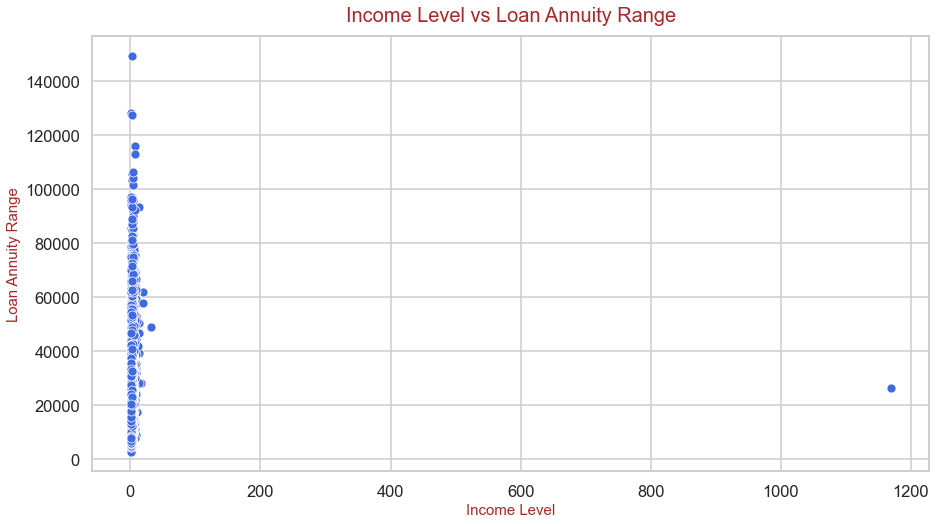

In [102]:
plt.figure(figsize=[15,8])
sns.scatterplot(data = Defaulter_1, x = 'AMT_INCOME_TOTAL', y = 'AMT_ANNUITY', color = "royalblue")
plt.title('Income Level vs Loan Annuity Range', fontsize = 20, color = 'Brown')
plt.xlabel("Income Level", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Annuity Range", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### <font color = Green > Insights for Income Level vs Loan Annuity Range: </font>

+ The Annuity Range cap in upto 1 lakh for majority of the repayers. 
+ Under it, there are few whose income level is more than 25 lakhs and there are two whose income level is 125 lakhs within the same cap. 
+ The Annuity Range cap in upto 80k for majority of the Defaulters.
+ There is an outlier with an income level of more than 1000 lakh who has defaulted within an annuity cap of under 40k. This could be an error.

## Checking for the Range of Credit Amount applied by the Prospects in respect to their Education Type and Family Status

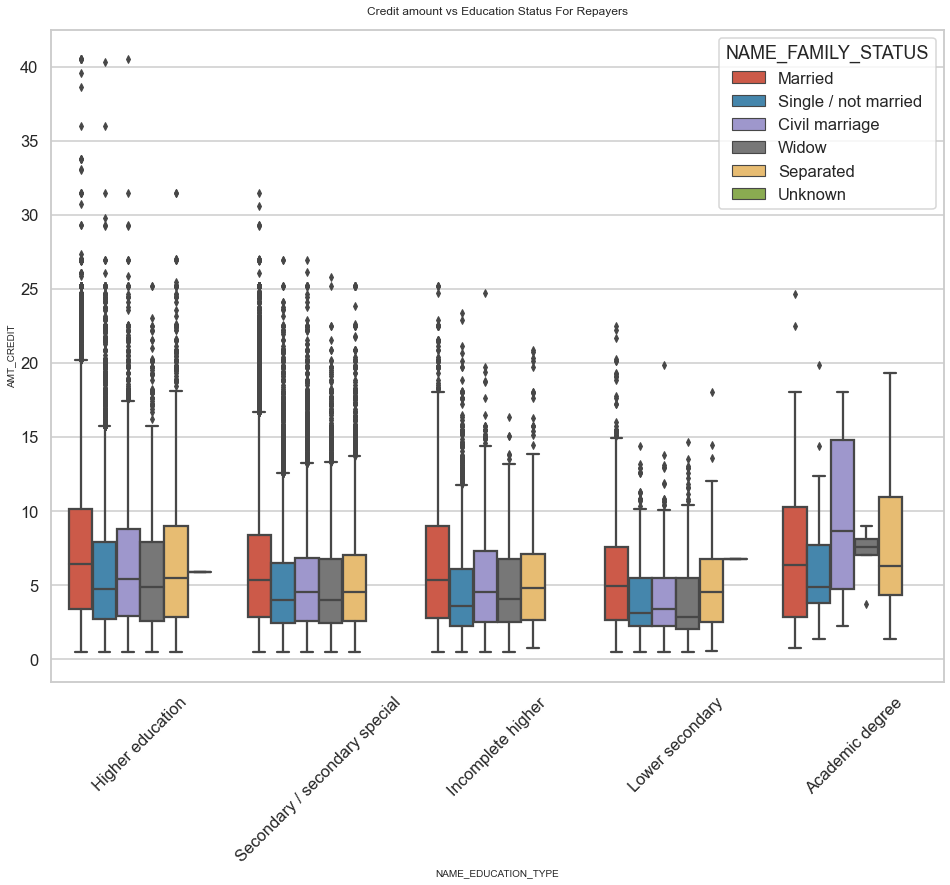

In [103]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = Repayer_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status For Repayers')
plt.show()

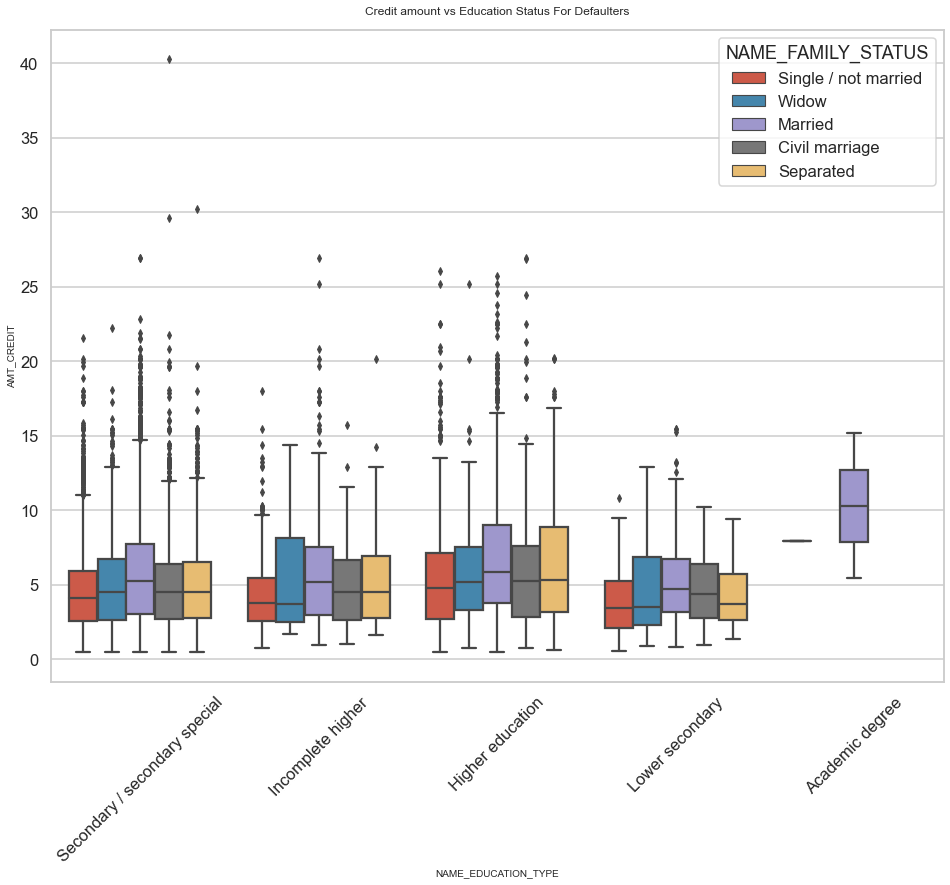

In [104]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = Defaulter_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status For Defaulters')
plt.show()

### <font color = Green > Insights for Credit amount vs Education Status for Repayers & Defaulters: </font>

+ Under Rpayers: Married, Civil Marriage and Separated having an Academic Degree seems to have applied more for larger credit amounts as compare to others. 
+ The median of the lower secondary education type for all the family status is low compared to others which means they opt for lower credit amount.
+ Under Defaulters: Only the Married ones having the Academic Degree seems to have more application for larger credit amounts followed by the ones having Higher Education degrees. 
+ There is one client under Secondary/Secondary Special under Civil Marriage with a credit amount of over 40 lakhs which could be a loss for the bank.

## Checking for the Level of Income applied by the Prospects in respect to their Education Type and Family Status

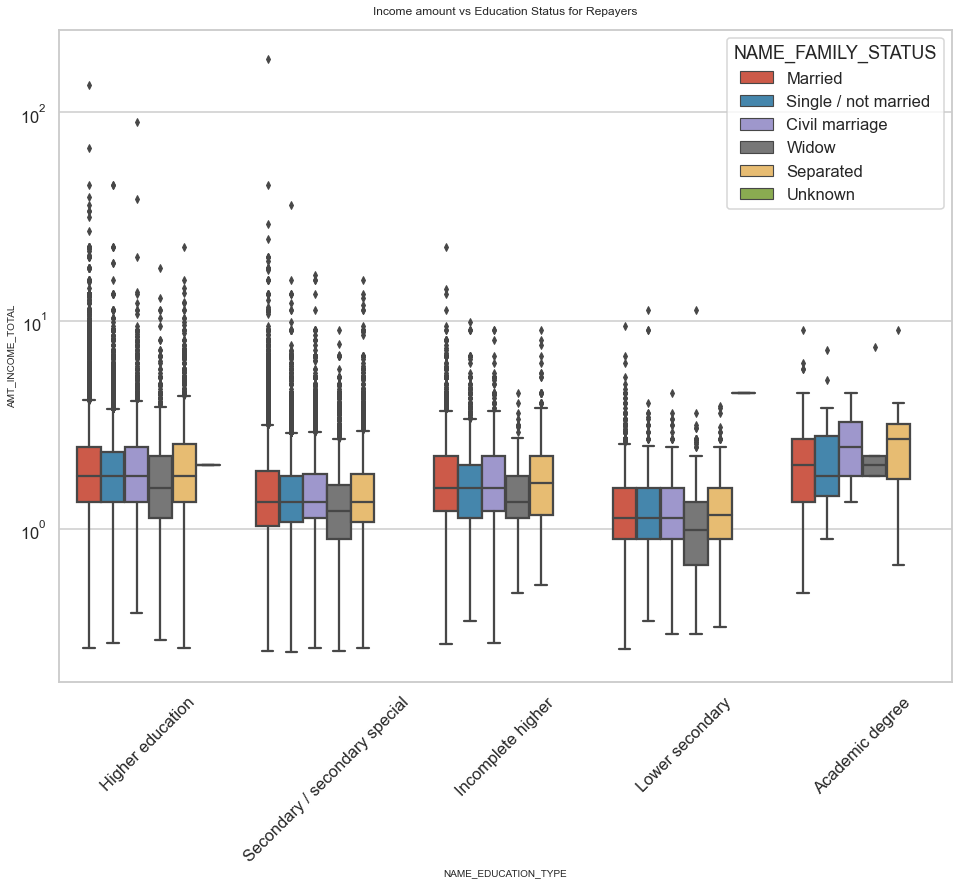

In [105]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =Repayer_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Repayers')
plt.show()

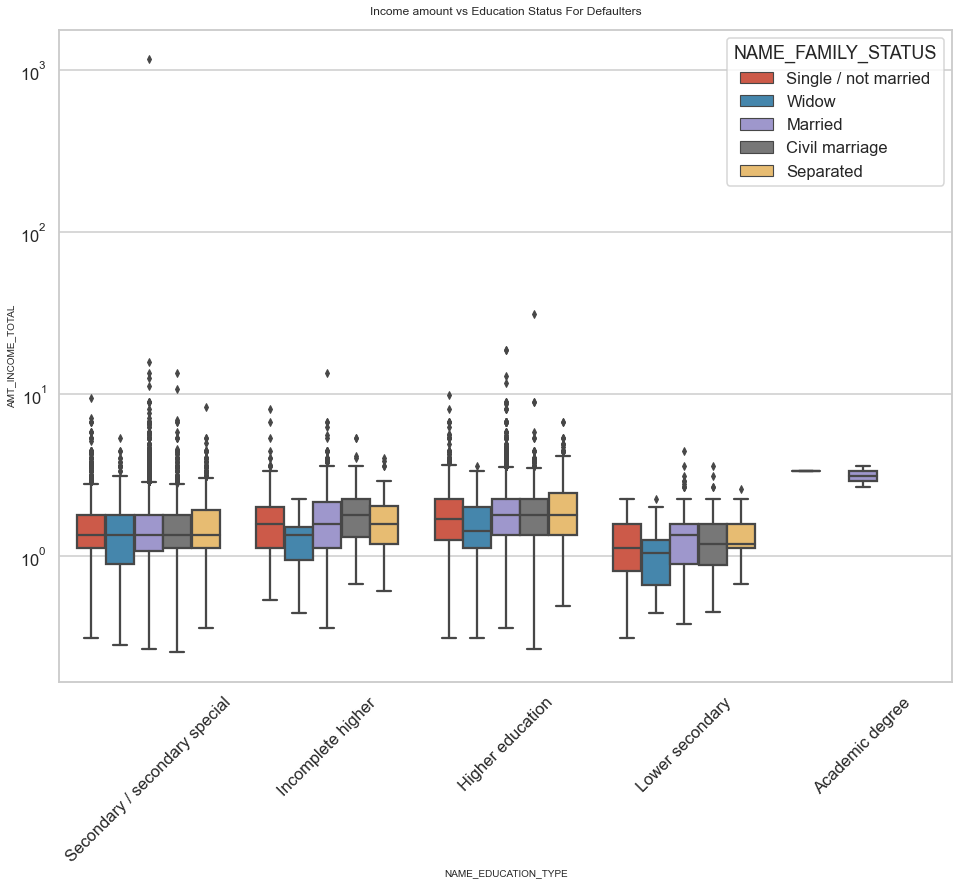

In [106]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = Defaulter_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status For Defaulters')
plt.show()

### <font color = Green > Insights for Income Amount vs Education Status for Repayers & Defaulters: </font>

+ Simirlay Under Repayers: Most of the crowd having an Academic Degree seems to have a Higher Income Level when it comes to repayig the loan back. 
+ Under Defaulters: Majority of the crowd from any family status does not have an Academic Degree except married ones. Rest from any Eduction Type have an moderate Income Level. 

#  Task - 2: Reading and understanding the dataset - 2

### Subtask 2.1: Importing the previous application data.

In [107]:
# Read the csv file using 'read_csv'. 
pappl_df = pd.read_csv('previous_application.csv')
pappl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [108]:
# Check the number of rows and columns in the dataframe

pappl_df.shape

(1048575, 37)

In [109]:
# Check the column-wise info and datatypes of the dataframe
pappl_df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

### Subtask 2.2:  Dealing with Null Values in Columns above 35%

In [110]:
# Checking Null Values

pnull_col = round((pappl_df.isnull().sum()*100/len(pappl_df)).sort_values(ascending = False),2)
pnull_col_35 = pnull_col[pnull_col>35] 
print(pnull_col_35)
print()
print("Number of Columns having missing values more than 35% :",len(pnull_col_35))

RATE_INTEREST_PRIVILEGED     99.65
RATE_INTEREST_PRIMARY        99.65
RATE_DOWN_PAYMENT            53.35
AMT_DOWN_PAYMENT             53.35
NAME_TYPE_SUITE              49.13
DAYS_TERMINATION             40.12
NFLAG_INSURED_ON_APPROVAL    40.12
DAYS_FIRST_DRAWING           40.12
DAYS_FIRST_DUE               40.12
DAYS_LAST_DUE_1ST_VERSION    40.12
DAYS_LAST_DUE                40.12
dtype: float64

Number of Columns having missing values more than 35% : 11


In [111]:
pnull_col_35.index

# Even if some of the columns may seem relevant as more than 35% of the data is missing in them, let's drop them out...

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE'], dtype='object')

In [112]:
# Dropping Columns Having Missing Values more than 35%

pappl_df.drop(columns = pnull_col_35.index, inplace = True)

In [113]:
pappl_df.shape # Now there are 26 columns remaining. 

(1048575, 26)

#### Dealing with rest of the Null Values in Columns

In [114]:
def premain_null_col(df):
    return round(pappl_df.isnull().sum()*100/len(pappl_df),4)

In [115]:
premain_null_col(pappl_df)[premain_null_col(pappl_df)>0]

AMT_ANNUITY            22.2215
AMT_GOODS_PRICE        22.9802
CNT_PAYMENT            22.2212
PRODUCT_COMBINATION     0.0214
dtype: float64

In [116]:
pappl_df['AMT_ANNUITY'].describe()

count    815566.000000
mean      15891.265151
std       14745.557438
min           0.000000
25%        6301.350000
50%       11250.000000
75%       20523.003750
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [117]:
pappl_df['AMT_ANNUITY'].mode()

0    2250.0
dtype: float64

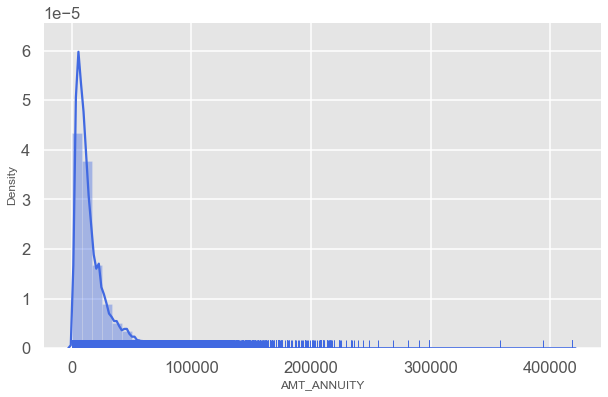

In [118]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(pappl_df['AMT_ANNUITY'], rug = True, color = 'royalblue')
plt.show()

### <font color = Green > Insights: </font>

Replacing it with the mean value

In [119]:
pappl_df['AMT_GOODS_PRICE'].describe()

count    8.076100e+05
mean     2.262892e+05
std      3.134490e+05
min      0.000000e+00
25%      5.058000e+04
50%      1.115116e+05
75%      2.295000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

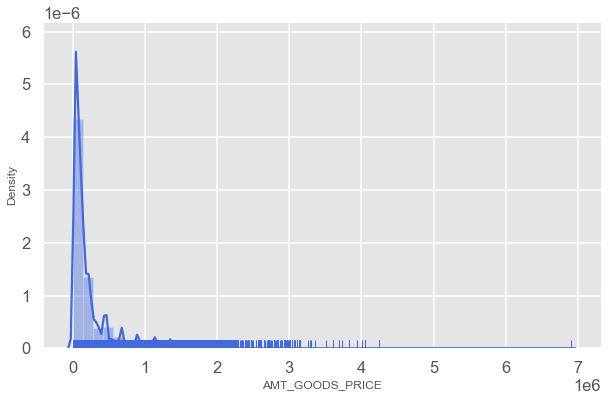

In [120]:
plt.figure(figsize=[10,6])
sns.distplot(pappl_df['AMT_GOODS_PRICE'], rug = True, color = 'royalblue')
plt.show()

In [121]:
pappl_df['AMT_GOODS_PRICE'].mode()

0    45000.0
dtype: float64

### <font color = Green > Insights: </font>

Replacing it with the mode value

In [122]:
pappl_df['CNT_PAYMENT'].describe()

count    815569.000000
mean         15.995639
std          14.508109
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

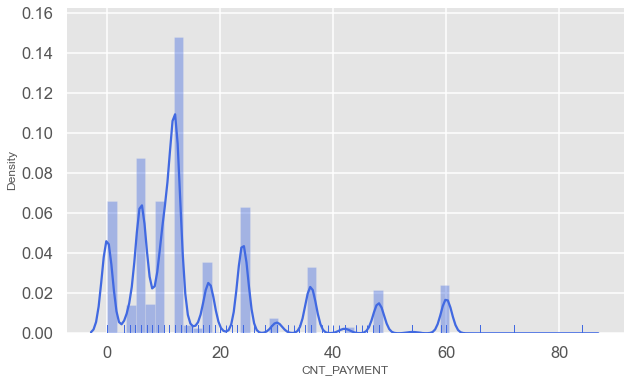

In [123]:
plt.figure(figsize=[10,6])
sns.distplot(pappl_df['CNT_PAYMENT'], rug = True, color = 'royalblue')
plt.show()

In [124]:
pappl_df['CNT_PAYMENT'].mode()

0    12.0
dtype: float64

### <font color = Green > Insights: </font>

Replacing it with the mean value

In [125]:
pappl_df['PRODUCT_COMBINATION'].value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

### <font color = Green > Insights: </font>

The Null Values are very less hence leaving it as it is..

In [126]:
repl_mean_val_df = pappl_df[['AMT_ANNUITY', 'CNT_PAYMENT']]

In [127]:
for i in repl_mean_val_df:

    pappl_df[i][pappl_df[i].isnull()] = pappl_df[i].mean()

In [128]:
pappl_df['AMT_GOODS_PRICE'].mode()[0]

45000.0

In [129]:
pappl_df['AMT_GOODS_PRICE'].fillna(pappl_df['AMT_GOODS_PRICE'].mode()[0], axis = 0, inplace = True)

In [130]:
premain_null_col(pappl_df)

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_ANNUITY                    0.0000
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0000
AMT_GOODS_PRICE                0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_AREA               0.0000
NAME_SELLER_INDUSTRY           0.0000
CNT_PAYMENT                    0.0000
NAME_YIELD_GROUP               0.0000
PRODUCT_COMBINATION            0.0214
dtype: float

#### There are almost no Null Values in Previous application Dataset

### Subtask 2.3: Numerical and Categorical Analysis


In [131]:
pappl_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count  1.048575e+06  1.048575e+06  1.048575e+06     1.048575e+06  1.048575e+06     1.048575e+06             1.048575e+06            1.048575e+06   1.048575e+06      1.048575e+06  1.048575e+06
mean   1.922775e+06  2.784367e+05  1.589127e+04     1.742698e+05  1.950000e+05     1.846285e+05             1.248486e+01            9.964123e-01  -8.820381e+02      3.183904e+02  1.599564e+01
std    5.329366e+05  1.028569e+05  1.300442e+04     2.910789e+05  3.169407e+05     2.854630e+05             3.333140e+00            5.979011e-02   7.792649e+02      7.996734e+03  1.279503e+01
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00             0.000000e+00            0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00
25%    1.460642e+06  1.893860e+05  7.506765e+03     1.890000e+04  2.427750e+04     4.500000e+04             1.000000e+01            1.000000e+00  -1.303000e+03     -1.000000e+00  1.000000e+01
50%    1.923419e+06  2.788100e+05  1.532997e+04     7.081650e+04  8.025300e+04     7.082100e+04             1.200000e+01            1.000000e+00  -5.830000e+02      4.000000e+00  1.200000e+01
75%    2.384448e+06  3.677445e+05  1.673721e+04     1.800000e+05  2.152395e+05     1.800000e+05             1.500000e+01            1.000000e+00  -2.810000e+02      8.500000e+01  1.600000e+01
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06             2.300000e+01            1.000000e+00  -2.000000e+00      4.000000e+06  8.400000e+01

### <font color = Green > Insights: </font>

+ The values are larger but not fixing those as it is not required.

In [132]:
pappl_df.select_dtypes(include=['object']).describe()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP PRODUCT_COMBINATION
count             1048575                    1048575                     1048575                1048575              1048575                1048575            1048575          1048575             1048575        1048575           1048575                  1048575              1048575          1048575             1048351
unique                  4                          7                           2                     25                    4                      4                  9                4                  28              5                 3                        8                   11                5                  17
top            Cash loans                    TUESDAY                           Y                    XAP             Approved  Cash through the bank                XAP         Repeater                 XNA            POS               XNA  Credit and cash offices                  XNA              XNA                Cash
freq               465861                     160290                     1043203                 582714               652486                 650604             849712           771957              593690         436846            670131                   451047               533625           323941              178352

### <font color = Green > Insights: </font>

+ We need to focus on Previous Cash Loan Purpose & Contract Status columns.

In [133]:
pappl_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

### Subtask 2.4: Identifying Outliers


In [134]:
outliers_check = [ 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE' , 'CNT_PAYMENT']

In [135]:
list(enumerate(outliers_check))

[(0, 'AMT_ANNUITY'),
 (1, 'AMT_APPLICATION'),
 (2, 'AMT_CREDIT'),
 (3, 'AMT_GOODS_PRICE'),
 (4, 'CNT_PAYMENT')]

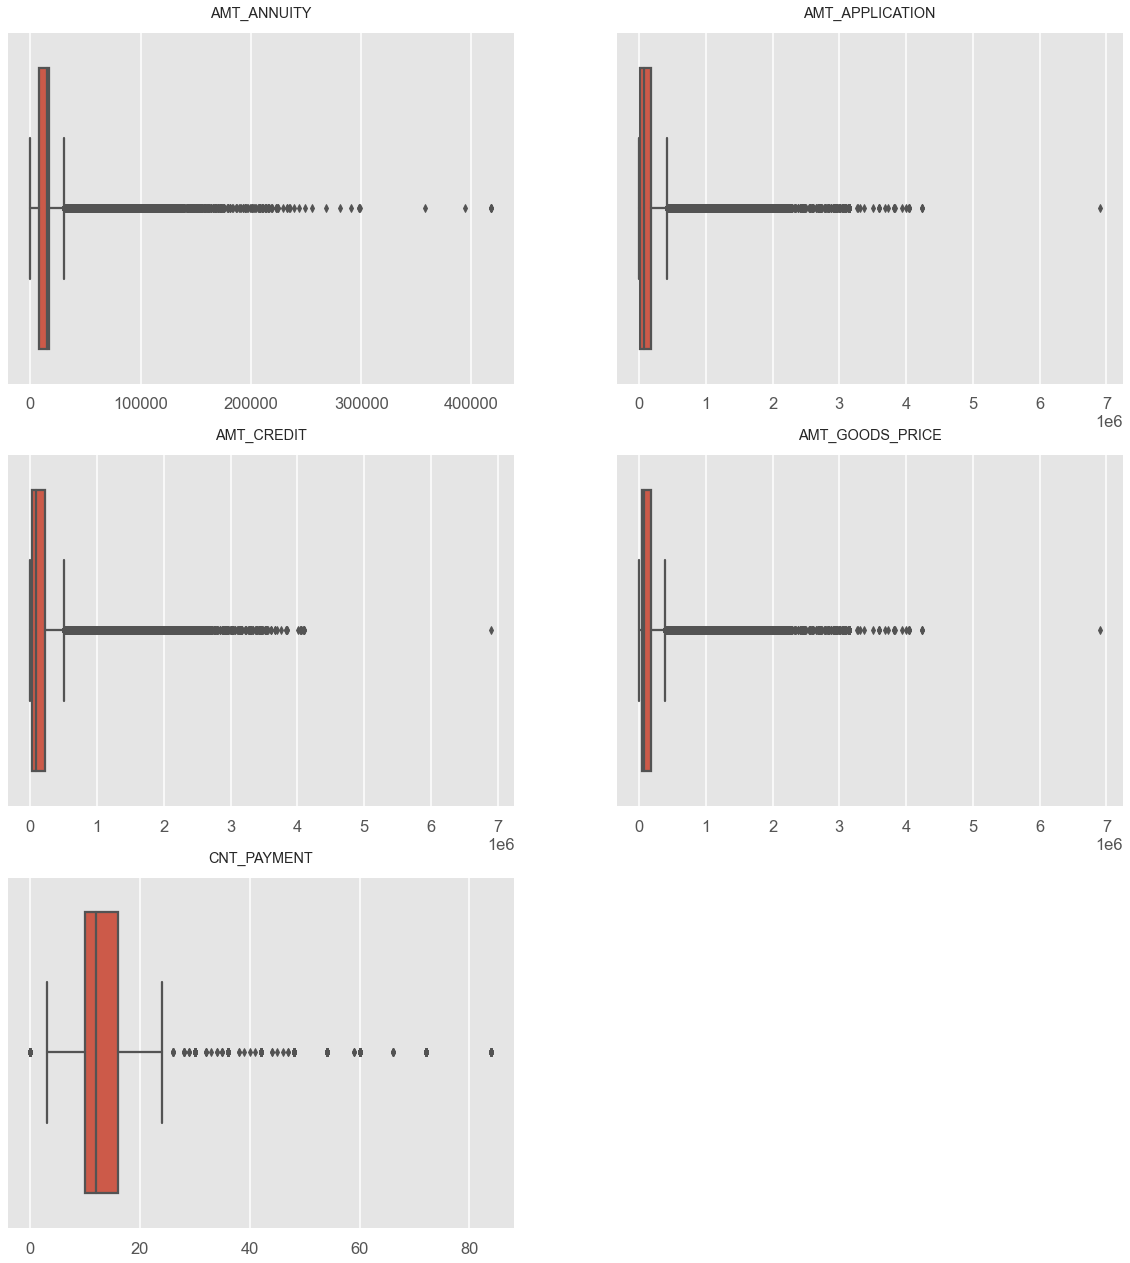

In [136]:
plt.figure(figsize=([20,22]))

for n,col in enumerate(outliers_check):
    plt.subplot(3,2,n+1)
    sns.boxplot(pappl_df[col], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)

### <font color = Green > Insights: </font>

+ Amounts in Annuity, Application, Credit and Goods Price have a huge number of outliers.
+ CNT_PAYMENT has outlier values but lesser as compare to others.

### Subtask 2.5: Merging both the dataset: 

In [137]:
pappl_df.SK_ID_PREV.isnull().sum()

0

In [138]:
appl_df.SK_ID_CURR.isnull().sum()

0

In [139]:
loan_df = pd.merge(left = appl_df, right = pappl_df, how = 'inner', on = 'SK_ID_CURR' )

In [140]:
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0      100002       1           Cash loans           M            N               Y             0             2.025         4.066        24700.5              3.510   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0           1               1                0                 1           1           0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0  25.920548     25-30        1.745205               0-5            <2          NaN  Defaulter     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                     SATURDAY                          9                           Y                       1                    XAP             Approved           -606                    XNA                XAP              New            Vehicles            POS               XNA                    Stone               500      Auto technology         24.0       low_normal      POS other wit

In [141]:
loan_df.shape

(887347, 103)

In [142]:
loan_df.info("all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887347 entries, 0 to 887346
Data columns (total 103 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE               object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    float64 
 18  DAY

### Subtask 2.6: Dropping Irrelevant Columns: 


In [143]:
##Deleting all the Flag columns 

for i in loan_df.columns:
    if i.startswith("FLAG"):
        loan_df.drop(columns=i, inplace=True)
        
loan_df.shape

(887347, 74)

In [144]:
##Deleting all the AMT_REQ columns 

for i in loan_df.columns:
    if i.startswith("AMT_REQ"):
        loan_df.drop(columns=i, inplace=True)
        
loan_df.shape

(887347, 68)

In [145]:
# Bifurcating the loan_df based on Target Value

In [146]:
Repayer_L0 = loan_df.loc[loan_df['NEW_TARGET'] == 'Repayer']
Defaulter_L1 = loan_df.loc[loan_df['NEW_TARGET'] == 'Defaulter']

In [147]:
Repayer_L0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
1      100003       0           Cash loans           F             0             2.700        12.935        35698.5             11.295          Family    State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0      Core staff              2.0                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0  45.931507     45-50        3.254795               0-5            <2          NaN    Repayer     1810518           Cash loans   98356.995000         900000.0     1035882.0           900000.0                       FRIDAY                         12                       1                    XNA             Approved           -746                    XNA                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA    12.000000       low_normal             Cash X-Sell: low
2      100003       0           Cash loans           F             0             2.700        12.935        35698.5             11.295          Family    State servant               Higher education               Married  House / apartment                    0.003541     16765.0         1188.0             1186.0            291.0      Core staff              2.0                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0  45.931507     45-50        3.254795               0-5            <2          NaN    Repayer     2636178       Consumer loans   64567.665000         337500.0      348637.5           337500.0                       SUNDAY                         17                       1                    XAP             Approved           -828  Cash through the bank                XAP        Refreshed           Furniture            POS               XNA                    Stone              1400            Furniture     6.000000           m

In [148]:
Defaulter_L1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0        100002       1           Cash loans           M             0             2.025         4.066        24700.5               3.51   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0  25.920548     25-30        1.745205               0-5            <2          NaN  Defaulter     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                     SATURDAY                          9                       1                    XAP             Approved           -606                    XNA                XAP              New                  Vehicles            POS               XNA                    Stone               500      Auto technology         24.0       low_normal   POS other with interest
104      100047       1           Cash loans           M             0             2.025        11.936        35028.0               8.55   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.025164     17482.0         1262.0             1182.0           1029.0        Laborers              2.0                     2                            2                      TUESDAY                          9                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       0.0                       0.0                       0.0                       0.0                  1075.0  47.895890     45-50        3.457534               0-5            <2          NaN  Defaulter     1472630      Revolving loans      22500.000              0.0      450000.0            45000.0                     SATURDAY                         14                       1                    XAP             Approved          -1172                    XNA                XAP         Repeater                       XNA          Cards            x-sell  Credit and cash offices                -1               

### Subtask 2.7: Final Analysis: 


In [149]:
loan_df['NAME_CONTRACT_STATUS'].value_counts(normalize = True)*100

Approved        62.831452
Canceled        18.206181
Refused         17.339215
Unused offer     1.623153
Name: NAME_CONTRACT_STATUS, dtype: float64

Repayer and Defaulter for :  Approved
Repayer      92.410673
Defaulter     7.589327
Name: NEW_TARGET, dtype: float64


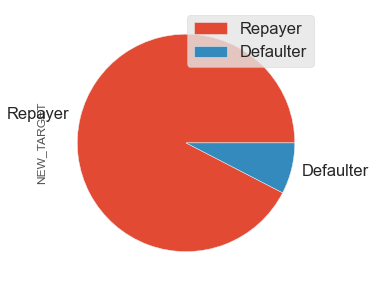

Repayer and Defaulter for :  Canceled
Repayer      90.824626
Defaulter     9.175374
Name: NEW_TARGET, dtype: float64


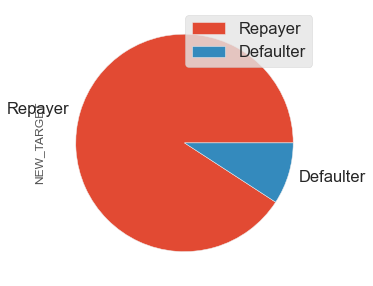

Repayer and Defaulter for :  Refused
Repayer      88.000052
Defaulter    11.999948
Name: NEW_TARGET, dtype: float64


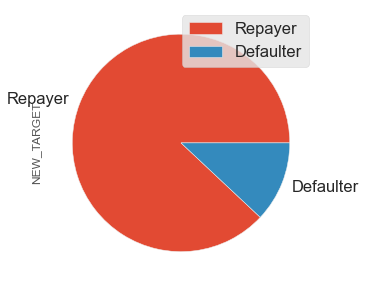

Repayer and Defaulter for :  Unused offer
Repayer      91.765604
Defaulter     8.234396
Name: NEW_TARGET, dtype: float64


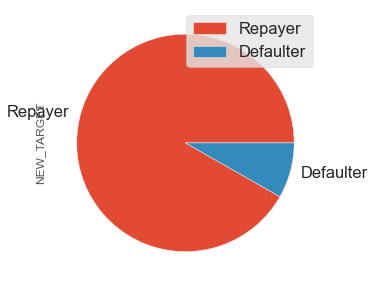

In [150]:
# Plotting Name contract status to check % of default & Repayers, i.e. Target 0 and 1

contract_status = loan_df['NAME_CONTRACT_STATUS'].unique()

for i in contract_status:
    print("Repayer and Defaulter for : ",i)
    plt.figure(figsize=[8,5])
    print(loan_df[(loan_df['NAME_CONTRACT_STATUS']==i)].NEW_TARGET.value_counts(normalize=True)*100)
    loan_df[(loan_df['NAME_CONTRACT_STATUS']==i)].NEW_TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()

### <font color = Green > Insights: </font>

1. 7.5% of Approved loans applicants have defaulted the previous loan sanctioned to them. 
3. 88 % of the Clients have Repayed the Current Loan who were Refused in the Previous application. 
2. Also, there are defaulters with with Refused, Cancelled, Unused loans in Previous application. This indicates that the company has approved the current and is facing default on these loans.

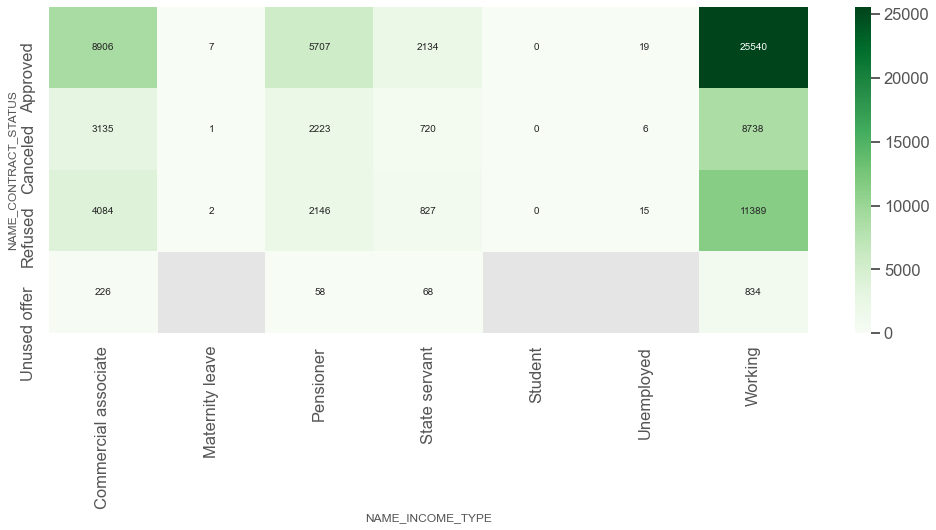

In [151]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=loan_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(17,6))
sns.heatmap(res, annot=True,cmap='Greens', fmt="g")
plt.show()

#### Note: Since Target 1 is default, higher on the above matrix shows correlation to default.
### <font color = Green > Insights: </font>

+ A Working applicant with an Approved Contrr=act Status has Defaulted in large numbers.
+ 8906 from Commercial associate who where Approved earlier have Defaulted. 
+ 11389 from Working class who were refused including 8738 who were canceled earlier have defaulted. 

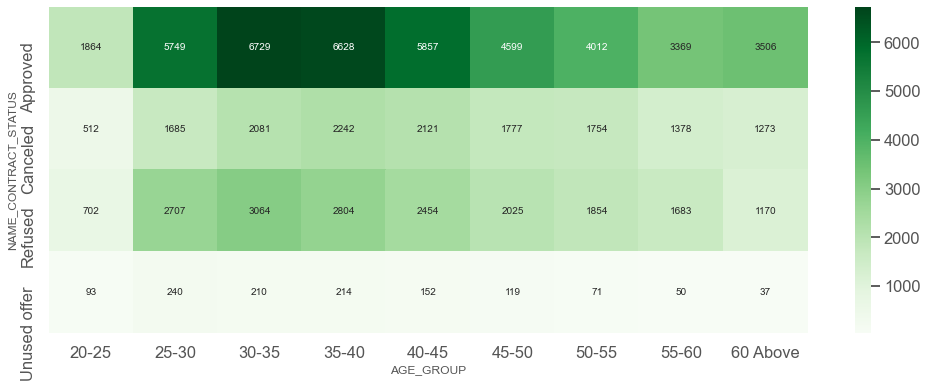

In [152]:
#Checking "NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target

res=pd.pivot_table(data=loan_df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(17,6))
sns.heatmap(res, annot=True,cmap='Greens', fmt="g")
plt.show()

#### Note: Since Target 1 is default, higher on the above matrix shows correlation to default.
    
### <font color = Green > Insights: </font>

+ Approved Loans of age group 25-30, 30-35, 35-40, 40-45 have highere defaults. 
+ Refused and cancelled earlier from the age of 25 till 50 has defaulted this time. 

In [153]:
## Checking for Defaults who were Approved Earlier:

In [154]:
loan_df[(loan_df["NAME_CONTRACT_STATUS"] == 'Approved') & (loan_df['TARGET'] == 1)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0           100002       1           Cash loans           M             0             2.025         4.066        24700.5              3.510   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801      9461.0          637.0             3648.0           2120.0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0  25.920548     25-30        1.745205               0-5            <2          NaN  Defaulter     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                     SATURDAY                          9                       1                    XAP             Approved           -606                    XNA                XAP              New                  Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest
104         100047       1           Cash loans           M             0             2.025        11.936        35028.0              8.550   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.025164     17482.0         1262.0             1182.0           1029.0        Laborers              2.0                     2                            2                      TUESDAY                          9                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       0.0                       0.0                       0.0                       0.0                  1075.0  47.895890     45-50        3.457534               0-5            <2          NaN  Defaulter     1472630      Revolving loans      22500.000              0.0      450000.0            45000.0                     SATURDAY                         14                       1                    XAP             Approved          -1172                    XNA                XAP         Repeater                       XNA          Cards            x-sell  Credit and cash offices                -1 

In [155]:
approved_default = loan_df[(loan_df["NAME_CONTRACT_STATUS"] == 'Approved') & (loan_df['TARGET'] == 1)]

In [156]:
# Checking for Repayers who were Refused Earlier: 

In [157]:
loan_df[(loan_df["NAME_CONTRACT_STATUS"] == 'Refused') & (loan_df['TARGET'] == 0)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE        AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYEMENT_YEARS FAMILY_COUNTS CHILD_COUNTS NEW_TARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION
19          100011       0           Cash loans           F             0             1.125        10.196        33826.5              9.135        Children             Pensioner  Secondary / secondary special               Married  House / apartment                    0.018634     20099.0       365243.0             7427.0           3514.0             NaN              2.0                     2                            2                    WEDNESDAY                         14                           0                           0                            0                       0                       0                        0                     XNA                       1.0                       0.0                       1.0                       0.0                     0.0  55.065753     55-60     1000.665753               NaN            <2          NaN    Repayer     2668005           Cash loans   15891.265151              0.0           0.0                0.0                    WEDNESDAY                          9                       1                    XNA              Refused          -1162  Cash through the bank              LIMIT         Repeater                 XNA            XNA               XNA  Credit and cash offices                -1                   XNA    15.995639              XNA                            Cash
51          100027       0           Cash loans           F             0             0.832         2.398        23850.0              2.250   Unaccompanied             Pensioner  Secondary / secondary special               Married  House / apartment                    0.006296     24827.0       365243.0             9012.0           3684.0             NaN              2.0                     3                            3                       FRIDAY                         12                           0                           0                            0                       0                       0                        0                     XNA                       0.0                       0.0                       0.0                       0.0                   795.0  68.019178  60 Above     1000.665753               NaN            <2          NaN    Repayer     2531618           Cash loans   22556.475000         225000.0      239850.0           225000.0                     SATURDAY                         14                       1                    XNA              Refused           -181  Cash through the bank                 HC         Repeater                 XNA           Cash            x-sell          AP+ (Cash loan)                 5             

In [158]:
refused_repayers = loan_df[(loan_df["NAME_CONTRACT_STATUS"] == 'Refused') & (loan_df['TARGET'] == 0)]

In [159]:
columns = [ 'AGE_GROUP', 'EMPLOYEMENT_YEARS', 'NAME_INCOME_TYPE',  'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
           'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'CHILD_COUNTS', 'FAMILY_COUNTS']


Defaulter % for Previously Approved:  AGE_GROUP
30-35       15.902914
35-40       15.664217
40-45       13.842082
25-30       13.586841
45-50       10.869000
50-55        9.481720
60 Above     8.285870
55-60        7.962092
20-25        4.405266
0-20         0.000000
Name: AGE_GROUP, dtype: float64


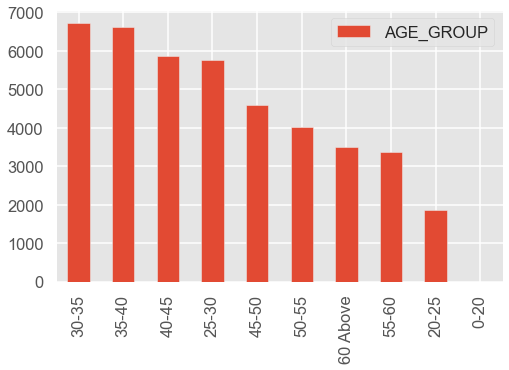

Defaulter % for Previously Approved:  EMPLOYEMENT_YEARS
0-5         61.102151
5-10        24.880409
10-15        8.247000
15-20        2.974059
20-25        1.631906
25-30        0.680644
30 Above     0.483831
Name: EMPLOYEMENT_YEARS, dtype: float64


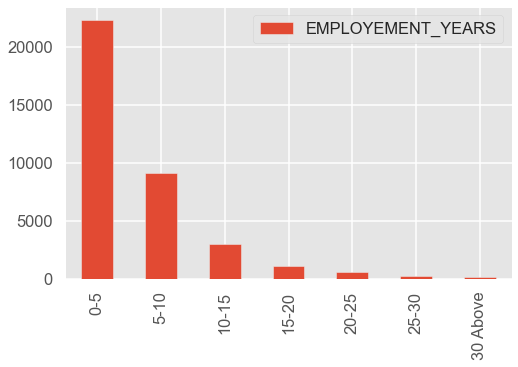

Defaulter % for Previously Approved:  NAME_INCOME_TYPE
Working                 60.359700
Commercial associate    21.047905
Pensioner               13.487581
State servant            5.043367
Unemployed               0.044903
Maternity leave          0.016543
Name: NAME_INCOME_TYPE, dtype: float64


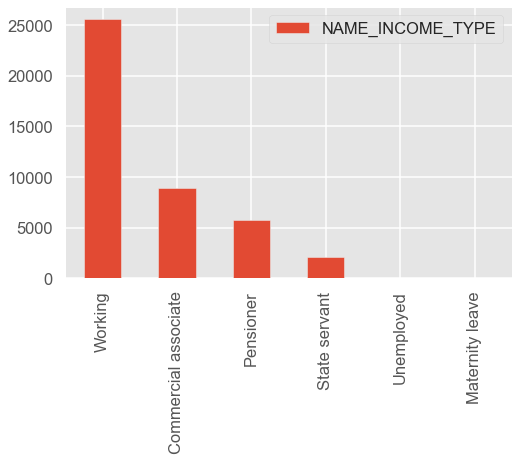

Defaulter % for Previously Approved:  NAME_EDUCATION_TYPE
Secondary / secondary special    80.017961
Higher education                 15.170279
Incomplete higher                 3.225959
Lower secondary                   1.576348
Academic degree                   0.009453
Name: NAME_EDUCATION_TYPE, dtype: float64


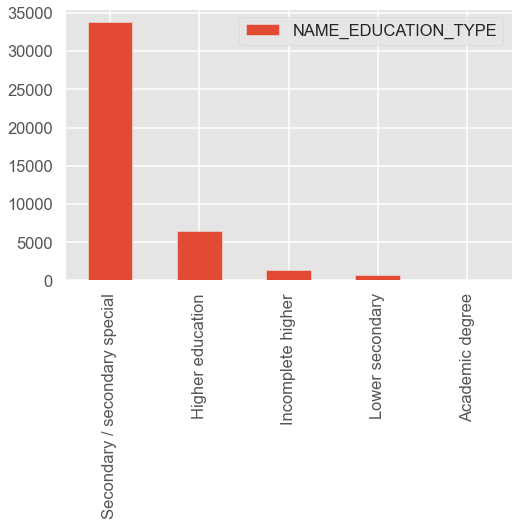

Defaulter % for Previously Approved:  OCCUPATION_TYPE
Laborers                 31.332197
Sales staff              16.727226
Drivers                  11.370141
Core staff                8.977781
Managers                  7.164217
Security staff            3.916525
High skill tech staff     3.816843
Cooking staff             3.392392
Medicine staff            3.260555
Accountants               2.726776
Cleaning staff            2.369851
Low-skill Laborers        2.061160
Private service staff     0.945368
Waiters/barmen staff      0.755651
Secretaries               0.517702
Realty agents             0.334416
HR staff                  0.173639
IT staff                  0.157561
Name: OCCUPATION_TYPE, dtype: float64


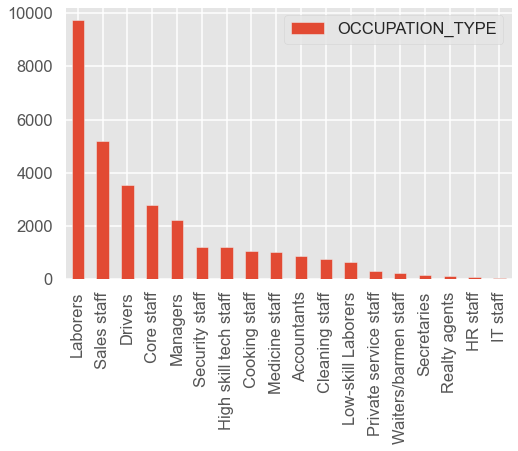

Defaulter % for Previously Approved:  ORGANIZATION_TYPE
Business Entity Type 3    24.318767
Self-employed             15.371163
XNA                       13.532484
Other                      5.033914
Business Entity Type 2     3.632453
Medicine                   3.211779
Trade: type 7              3.138515
Construction               3.051072
Government                 2.970718
School                     2.157729
Business Entity Type 1     2.051379
Transport: type 4          2.011202
Kindergarten               1.900125
Industry: type 3           1.514901
Security                   1.314017
Trade: type 3              1.262023
Industry: type 9           0.987876
Industry: type 11          0.950063
Agriculture                0.938246
Housing                    0.902796
Restaurant                 0.838986
Transport: type 3          0.775175
Transport: type 2          0.718455
Postal                     0.649918
Military                   0.623922
Trade: type 2              0.581382
Police  

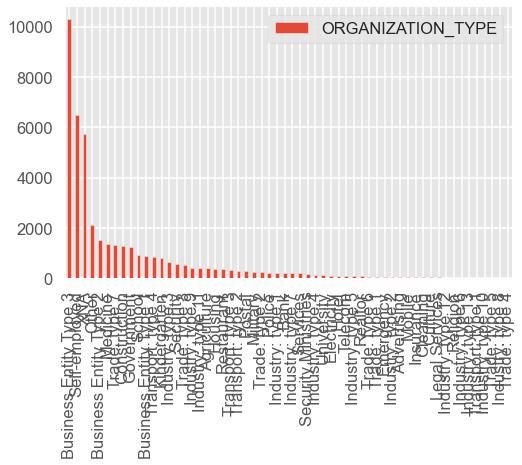

Defaulter % for Previously Approved:  NAME_HOUSING_TYPE
House / apartment      86.344622
With parents            6.402288
Municipal apartment     4.090941
Rented apartment        2.204996
Office apartment        0.664099
Co-op apartment         0.293054
Name: NAME_HOUSING_TYPE, dtype: float64


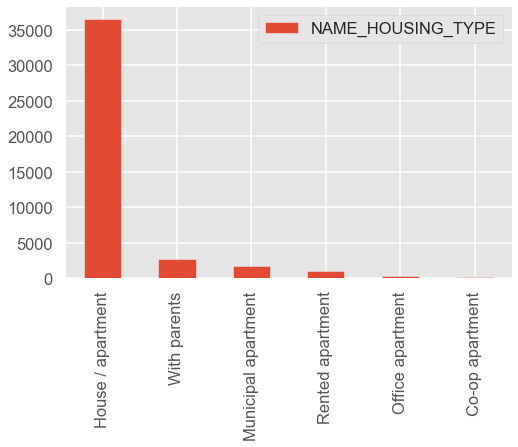

Defaulter % for Previously Approved:  NAME_FAMILY_STATUS
Married                 62.373266
Single / not married    15.546050
Civil marriage          11.745799
Separated                6.206131
Widow                    4.128755
Name: NAME_FAMILY_STATUS, dtype: float64


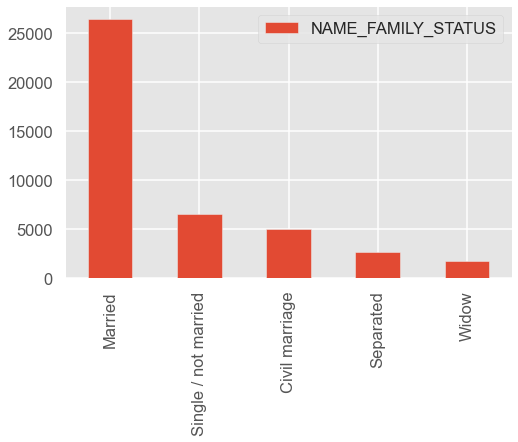

Defaulter % for Previously Approved:  CHILD_COUNTS
<1      65.617573
1-2     29.175369
2-3      4.342816
3-4      0.676990
4-5      0.086424
5-6      0.079222
9-10     0.021606
10+      0.000000
7-8      0.000000
6-7      0.000000
Name: CHILD_COUNTS, dtype: float64


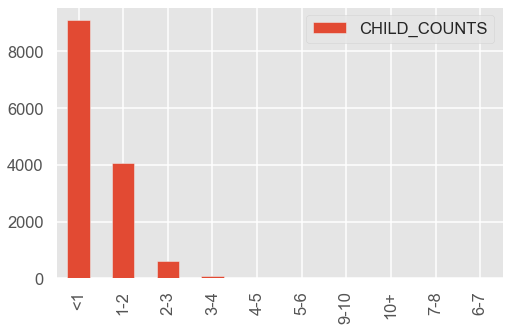

Defaulter % for Previously Approved:  FAMILY_COUNTS
<2       71.200340
2-4      27.183135
4-6       1.566894
6-8       0.040177
10-12     0.007090
12-14     0.002363
20+       0.000000
18-20     0.000000
16-18     0.000000
14-16     0.000000
8-10      0.000000
Name: FAMILY_COUNTS, dtype: float64


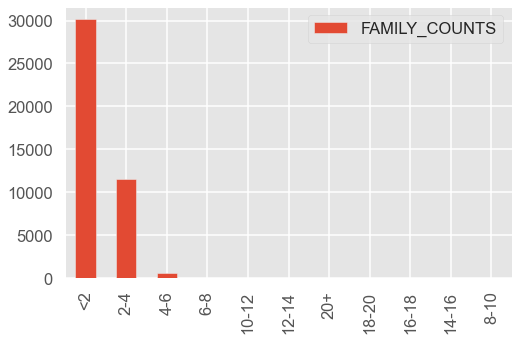

In [160]:
# Gathering all Defaulter % for Previously Approved in repsect to above Variables: 

for i in columns:
    print("Defaulter % for Previously Approved: ", i)
    plt.figure(figsize=[8,5])
    print(approved_default[i].value_counts(normalize=True)*100)
    approved_default[i].value_counts().plot.bar()
    plt.legend()
    plt.show()

### <font color = Green > Insights for Defaulter % for Previously Approved: </font>

+ Age Group of 30-35, followed by 35-45  
+ Employement Years - 0-5
+ Income Type - Working
+ Education Type - Secondary Special
+ Occupation Type - Labourers 
+ Organization Type - Business type 3
+ Housing Type - House/Appartment
+ Family Status - Married Ones 
+ Child Count - 0 and 1/2
+ Family Count - less than 2 and 2-4

Repayer % for Previously Refused for:  AGE_GROUP
40-45       13.219002
35-40       13.128157
60 Above    12.611155
30-35       12.507755
55-60       11.750716
45-50       11.461934
50-55       11.255133
25-30       10.929422
20-25        3.136725
0-20         0.000000
Name: AGE_GROUP, dtype: float64


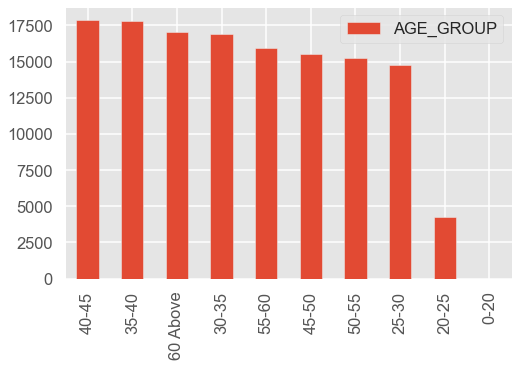

Repayer % for Previously Refused for:  EMPLOYEMENT_YEARS
0-5         53.164143
5-10        27.156132
10-15       10.834476
15-20        4.260943
20-25        2.177250
25-30        1.217153
30 Above     1.189903
Name: EMPLOYEMENT_YEARS, dtype: float64


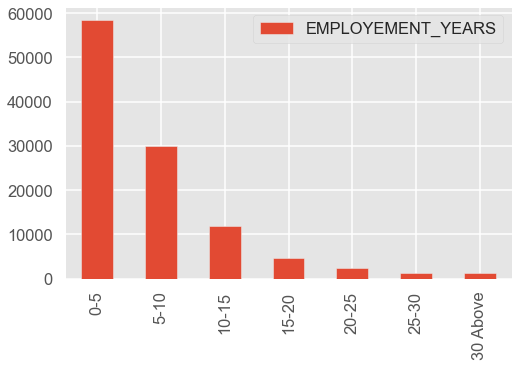

Repayer % for Previously Refused for:  NAME_INCOME_TYPE
Working                 50.780673
Commercial associate    23.940885
Pensioner               18.691837
State servant            6.579219
Unemployed               0.006647
Student                  0.000739
Name: NAME_INCOME_TYPE, dtype: float64


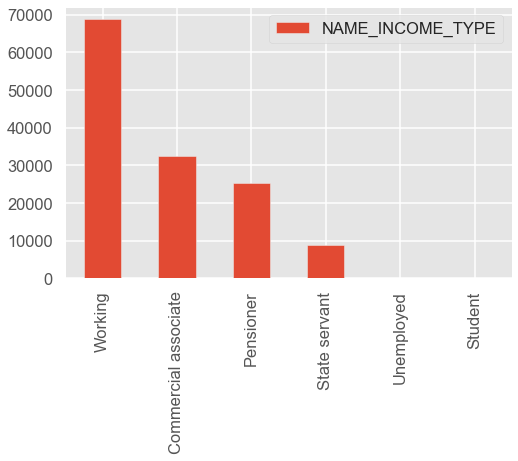

Repayer % for Previously Refused for:  NAME_EDUCATION_TYPE
Secondary / secondary special    72.432716
Higher education                 22.794617
Incomplete higher                 3.554758
Lower secondary                   1.178026
Academic degree                   0.039883
Name: NAME_EDUCATION_TYPE, dtype: float64


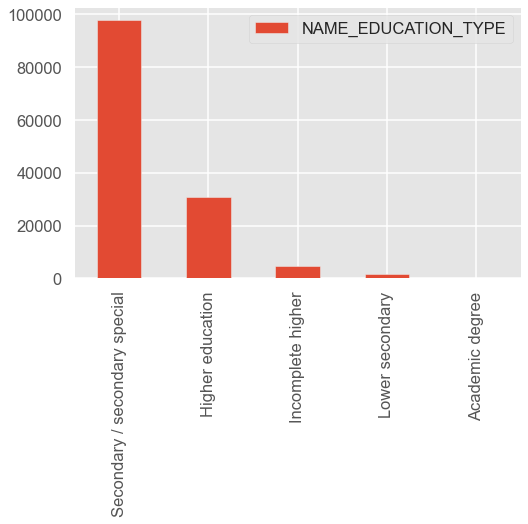

Repayer % for Previously Refused for:  OCCUPATION_TYPE
Laborers                 25.168739
Sales staff              16.697051
Core staff               12.597391
Managers                 11.005491
Drivers                   8.630119
High skill tech staff     4.791979
Accountants               4.164768
Medicine staff            4.107255
Security staff            3.126289
Cooking staff             2.945070
Cleaning staff            2.683551
Private service staff     1.343403
Low-skill Laborers        0.889815
Waiters/barmen staff      0.615274
Secretaries               0.489398
Realty agents             0.333138
HR staff                  0.252838
IT staff                  0.158430
Name: OCCUPATION_TYPE, dtype: float64


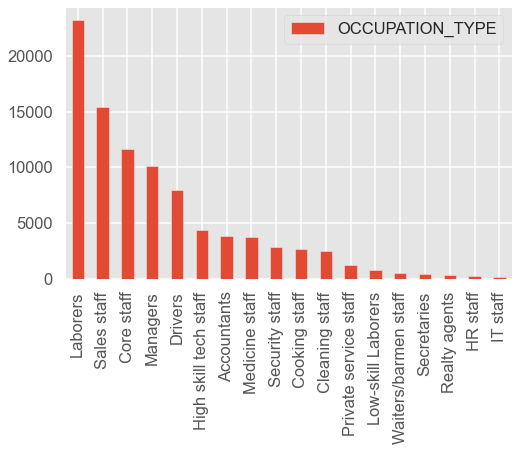

Repayer % for Previously Refused for:  ORGANIZATION_TYPE
Business Entity Type 3    21.881739
XNA                       18.688144
Self-employed             13.074241
Other                      5.004579
Medicine                   3.643387
Business Entity Type 2     3.179562
Government                 3.066560
Trade: type 7              2.919584
School                     2.647789
Kindergarten               2.080564
Construction               2.014092
Transport: type 4          1.861207
Business Entity Type 1     1.776271
Trade: type 2              1.527372
Security                   1.083488
Trade: type 3              1.048775
Industry: type 3           1.045821
Industry: type 9           1.004461
Housing                    0.959408
Bank                       0.904015
Military                   0.812432
Industry: type 11          0.812432
Agriculture                0.790274
Police                     0.727496
Postal                     0.673580
Security Ministries        0.641821
Restaur

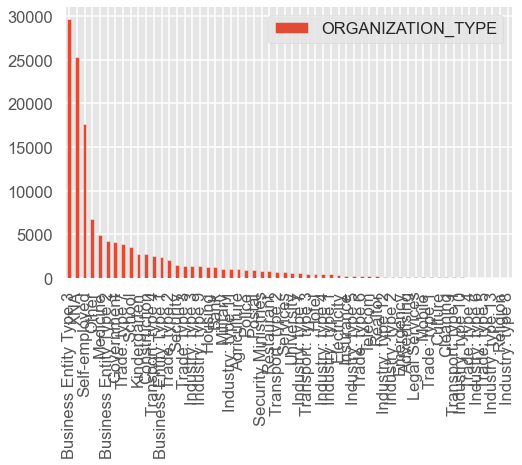

Repayer % for Previously Refused for:  NAME_HOUSING_TYPE
House / apartment      89.779609
With parents            4.331738
Municipal apartment     3.387840
Rented apartment        1.409200
Office apartment        0.843452
Co-op apartment         0.248161
Name: NAME_HOUSING_TYPE, dtype: float64


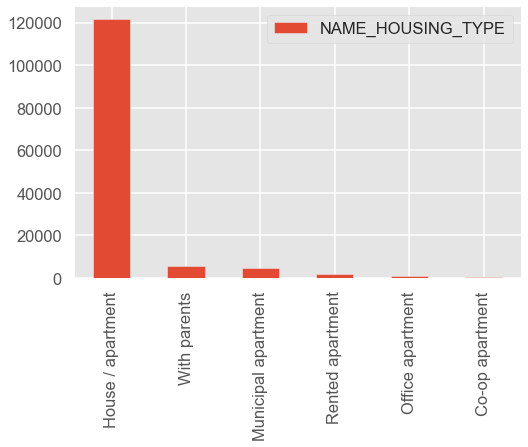

Repayer % for Previously Refused for:  NAME_FAMILY_STATUS
Married                 62.141422
Single / not married    13.725664
Civil marriage          11.345978
Separated                6.742444
Widow                    6.044492
Name: NAME_FAMILY_STATUS, dtype: float64


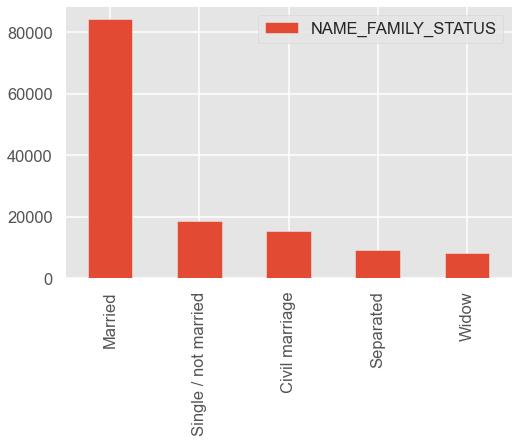

Repayer % for Previously Refused for:  CHILD_COUNTS
<1      65.523573
1-2     29.532322
2-3      4.379759
3-4      0.413134
4-5      0.110709
5-6      0.035103
10+      0.002700
6-7      0.002700
9-10     0.000000
7-8      0.000000
Name: CHILD_COUNTS, dtype: float64


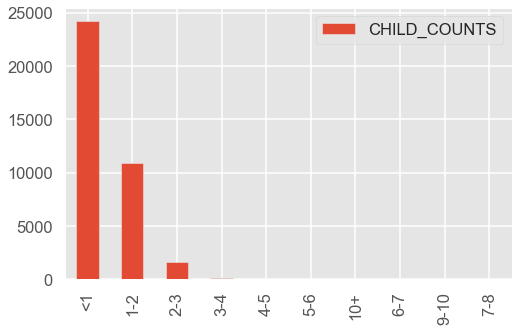

Repayer % for Previously Refused for:  FAMILY_COUNTS
<2       75.828680
2-4      22.910573
4-6       1.220125
6-8       0.039144
10-12     0.000739
8-10      0.000739
20+       0.000000
18-20     0.000000
16-18     0.000000
14-16     0.000000
12-14     0.000000
Name: FAMILY_COUNTS, dtype: float64


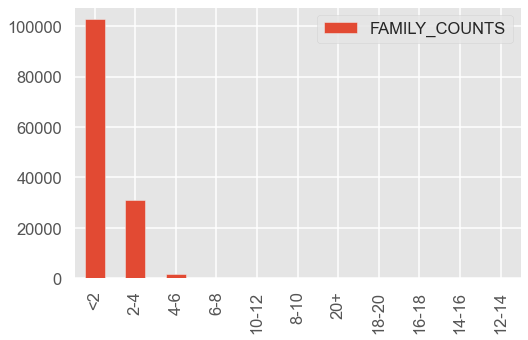

In [161]:
# Gathering all Repayer % for Previously Refused in repsect to above Variables: 

for i in columns:
    print("Repayer % for Previously Refused for: ", i)
    plt.figure(figsize=[8,5])
    print(refused_repayers[i].value_counts(normalize=True)*100)
    refused_repayers[i].value_counts().plot.bar()
    plt.legend()
    plt.show()

### <font color = Green > Insights for Repayer % for Previously Refused: </font>

+ Age Group of 30 - 45 and 60 above. 
+ Employement Years - 0-5 & 5-10.
+ Income Type - Working
+ Educaton Tyoe - Secondary Special
+ Occupation Type - Labourers followed by Sales Staff and Core Staff
+ Organization Type - Business type 3
+ Housing Type - House/Appartment
+ Family Status - Married Ones 
+ Child Count - 0 and 1/2
+ Family Count - less than 2 and 2-4



### Subtask 2.7: Case Summary: 

+ Females are more likely to Repay whereas Males are more likhely to default. 
+ 11% of the clients who did not repay the current loan who were refused in the previous application
+ People having an Academic Degree are less likely to Default but does not mean they Repay too. Proper scrunity is needed by considering other parameters. 
+ People with Secondary Special education type are higher as Defaulters. 
+ Student and Businessmen from Income Type have no defaults. 
+ People above the age of 50 has lower likeliness to default. 
+ Prospects with 30+ year experience having less than 1% default rate.
+ Banks should focus less on income type ‘Working’ as they are having most number of Defaulters. 


